<a href="https://colab.research.google.com/github/jcmm518/TFM/blob/main/TFM_Predicciones_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada - TFM - Juan Carlos Marin Mejia

## TFM
Nombre y Apellidos: **Juan Carlos Marin Mejia**   <br>

Asignatura        : **TFM** <br>

Asesor          : **Rodríguez Sánchez María De Los Ángeles** <br>

Director          : **Colomer Granero Adrián** <br>

Universidad       : **Universidad internacional de valencia** <br>

Fecha             : **Julio -2022** <br>

#Carga de folder

## cargar Folder

In [ ]:
# Configuracion Drive
BASE_FOLDER = '/content/drive/My Drive/TFM/'


from google.colab import drive
drive.mount('/content/drive/')



Mounted at /content/drive/


## Tips

In [ ]:
# Exportar 
#dataframe.to_csv("nombre.csv",sep="\t")

# codificar a valores y dejar la columna nativa
# encoder = LabelEncoder()
# Df_Resul2['clase_vehiculo']= encoder.fit_transform(DF_Resul2.CLASE_VEHICULO.values)

# ver los valores codificados despues de convertirlos
# print(Df_Resul2.clase_vehiculo.unique())

#Iniciar librerias

In [ ]:
# Importamos librerias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import pickle
import csv
import io
import seaborn as sns
import calendar
import time
import random
%matplotlib inline

# Include all packages
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score,classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import datasets,linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn import metrics,tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
import networkx as nx
pd.set_option('display.max_rows',90)
pd.set_option('display.max_columns',90)

#Cargar DF

In [ ]:
# Cargamos DF 
dirs = BASE_FOLDER + 'Siniestralidad_2010_2020.csv'
dirc = BASE_FOLDER + 'comunas.csv'
dirr = BASE_FOLDER + 'rutas.csv'
DF_Principal = pd.read_csv(dirs, delimiter=",", parse_dates= [2,4,12], encoding='utf-8-sig')
DF_Comunas   = pd.read_csv(dirc, delimiter=";")
DF_Rutas   = pd.read_csv(dirr, delimiter=";")
#DF_Comunas.set_index(["Codigo_Comuna"],  inplace= True)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Tratamiento de datos

In [ ]:
#display(DF_Principal.head(20))
Df_Resul = DF_Principal[['CLASE_VEHICULO','CONDICION_CLIMATICA','LOCALIDAD_O_COMUNA','NRO_VICTIMA_HERIDO','FECHA_ACCIDENTE',
                         'FECHA_INGRESO_ACCIDENTE','HORA_ACCIDENTE','GENERO','TIPO_SERVICIO','LLEVA','TIPO_VICTIMA',
                         'FECHA_NACIMIENTO','GRAVEDAD','NRO_VICTIMA_Peaton','NRO_VICTIMA_ACOMPANANTE','NRO_VICTIMA_PASAJERO',
                         'NRO_VICTIMA_CONDUCTOR','ESTADO_BEODEZ','ESTADO_DROGA','DESC_CLASE_ACCIDENTE','DESC_CHOQUE_ACCIDENTE',
                         'DESC_AREA_ACCIDENTE','DESC_SECTOR_ACCIDENTE','ESTADO_CALLE','CAUSA_ACCIDENTE','NRO_VICTIMA_MUERTO']]

# arreglo de datos de clase de vehiculo

Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "ARTICULADO", "CLASE_VEHICULO"] = "BUS"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "ALIMENTADOR", "CLASE_VEHICULO"] = "BUS"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "BUSETA", "CLASE_VEHICULO"] = "BUS"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "CAMION D.TROQUE", "CLASE_VEHICULO"] = "CAMION"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "CARRETILLA APILADORA", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "CARRETILLA ELEVADORA", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "COMPACTADORA", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "MANIPULADOR TELESCOPICO", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "MAQ. AGRICOLA", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "MAQ. INDUSTRIAL", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "MINICARGADOR RNMA", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "MONTACARGA", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "RETROEXCAVADORA", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "RETROEXCAVADORA RMNA", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "RETROEXCAVADORA RNMA", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "CARGADOR", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "BULDOZER RNMA", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "PAVIMENTADORA", "CLASE_VEHICULO"] = "MAQUINARIA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "MICROBUS", "CLASE_VEHICULO"] = "BUS"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "MINI BUS", "CLASE_VEHICULO"] = "BUS"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "REMOLQUE", "CLASE_VEHICULO"] = "TRACTOCAMION"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "TRACTO-CAMION REMOLQUE", "CLASE_VEHICULO"] = "TRACTOCAMION"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "VOLQUETA D.TROQUE", "CLASE_VEHICULO"] = "VOLQUETA"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "CUADRICICLO", "CLASE_VEHICULO"] = "CUATRIMOTO"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "MOTOCARRO", "CLASE_VEHICULO"] = "CUATRIMOTO"
Df_Resul.loc[Df_Resul['CLASE_VEHICULO'] == "MOTONETA", "CLASE_VEHICULO"] = "MOTOCICLETA"

# arreglo de datos de localidades

Df_Resul.loc[Df_Resul['LOCALIDAD_O_COMUNA'] == "BOSQUES DE ZUÑIGA", "LOCALIDAD_O_COMUNA"] = "BOSQUES DE ZUNIGA"
Df_Resul.loc[Df_Resul['LOCALIDAD_O_COMUNA'] == "BOSQUES DE ZUÑIGA ", "LOCALIDAD_O_COMUNA"] = "BOSQUES DE ZUNIGA"
Df_Resul.loc[Df_Resul['LOCALIDAD_O_COMUNA'] == "EL CHINGUÍ", "LOCALIDAD_O_COMUNA"] = "EL CHINGUI"
Df_Resul.loc[Df_Resul['LOCALIDAD_O_COMUNA'] == "ZUÑIGA", "LOCALIDAD_O_COMUNA"] = "ZUNIGA"
Df_Resul.loc[Df_Resul['LLEVA'] == "CINTURÓN", "LLEVA"] = "CINTURON"
Df_Resul.loc[Df_Resul['LLEVA'] == "NO LO TENÍA", "LLEVA"] = "NO LO TENIA"
Df_Resul.loc[Df_Resul['TIPO_VICTIMA'] == "Acompañante", "TIPO_VICTIMA"] = "Acompanante"
Df_Resul.loc[Df_Resul['ESTADO_DROGA'] == "0.0", "ESTADO_DROGA"] = "0"
Df_Resul.loc[Df_Resul['ESTADO_DROGA'] == "0", "ESTADO_DROGA"] = "0"
Df_Resul.loc[Df_Resul['ESTADO_DROGA'] == "N", "ESTADO_DROGA"] = "0"
Df_Resul.loc[Df_Resul['ESTADO_DROGA'] == "S", "ESTADO_DROGA"] = "1"


# eliminar nulos
Existen_Nulos = Df_Resul.isnull().values.any()
if Existen_Nulos :
  contador = 0
  for i in range(len(Df_Resul)): 
    if pd.isnull(Df_Resul.loc[i,"CLASE_VEHICULO"]) and pd.isnull(Df_Resul.loc[i,"CONDICION_CLIMATICA"])  and pd.isnull(Df_Resul.loc[i,"LOCALIDAD_O_COMUNA"]) and pd.isnull(Df_Resul.loc[i,"FECHA_ACCIDENTE"]):
      Df_Resul.drop([i],axis=0,inplace=True)
      contador = contador + 1
    else:
      if pd.isnull(Df_Resul.loc[i,"FECHA_ACCIDENTE"]):
        Df_Resul.drop([i],axis=0,inplace=True)
        contador = contador + 1       
  print('Registros eliminados que no aportan al analisis: '+ str(contador))

# Arreglos de NAN
Df_Resul['CLASE_VEHICULO'] = Df_Resul['CLASE_VEHICULO'].fillna("AUTOMOVIL")
Df_Resul['TIPO_SERVICIO'] = Df_Resul['TIPO_SERVICIO'].fillna("PARTICULAR")
Df_Resul['TIPO_VICTIMA'] = Df_Resul['TIPO_VICTIMA'].fillna("NO REGISTRA")
Df_Resul['GRAVEDAD'] = Df_Resul['GRAVEDAD'].fillna("NO REGISTRA")
Df_Resul['FECHA_ACCIDENTE'] = Df_Resul['FECHA_ACCIDENTE'].fillna(Df_Resul['FECHA_INGRESO_ACCIDENTE'])
Df_Resul['NRO_VICTIMA_HERIDO'] = Df_Resul['NRO_VICTIMA_HERIDO'].fillna(0)
Df_Resul['NRO_VICTIMA_MUERTO'] = Df_Resul['NRO_VICTIMA_MUERTO'].fillna(0)
Df_Resul['GENERO'] = Df_Resul['GENERO'].fillna('No Registra')
Df_Resul['NRO_VICTIMA_Peaton'] = Df_Resul['NRO_VICTIMA_Peaton'].fillna(0)
Df_Resul['NRO_VICTIMA_ACOMPANANTE'] = Df_Resul['NRO_VICTIMA_ACOMPANANTE'].fillna(0)
Df_Resul['NRO_VICTIMA_PASAJERO'] = Df_Resul['NRO_VICTIMA_PASAJERO'].fillna(0)
Df_Resul['NRO_VICTIMA_CONDUCTOR'] = Df_Resul['NRO_VICTIMA_CONDUCTOR'].fillna(0)
Df_Resul['DESC_SECTOR_ACCIDENTE'] = Df_Resul['DESC_SECTOR_ACCIDENTE'].fillna('NO REPORTADO')
Df_Resul['CONDICION_CLIMATICA'] = Df_Resul['CONDICION_CLIMATICA'].fillna('NR')
Df_Resul['ESTADO_CALLE'] = Df_Resul['ESTADO_CALLE'].fillna('NO REPORTA')
Df_Resul['LOCALIDAD_O_COMUNA'] = Df_Resul['LOCALIDAD_O_COMUNA'].str.strip()

# se recalculan las edades con las fechas de nacimiento
numerodias = 365.2425
Df_Resul['EDAD'] = (Df_Resul['FECHA_ACCIDENTE'] - Df_Resul['FECHA_NACIMIENTO']).dt.days
Df_Resul['EDAD'] = Df_Resul['EDAD'] / numerodias

#Adicionar año y mes para todos los analisis
Df_Resul['Anio'] = pd.to_datetime(Df_Resul['FECHA_ACCIDENTE'], errors='coerce').dt.strftime('%Y')
Df_Resul['Mes'] = pd.to_datetime(Df_Resul['FECHA_ACCIDENTE'], errors='coerce').dt.strftime('%m')
Df_Resul['NombreDiaNum'] = pd.to_datetime(Df_Resul['FECHA_ACCIDENTE'], errors='coerce').dt.strftime('%w')
Df_Resul['NombreDia'] = pd.to_datetime(Df_Resul['FECHA_ACCIDENTE'], errors='coerce').dt.strftime('%A')
Df_Resul['FechaDia'] = pd.to_datetime(Df_Resul['FECHA_ACCIDENTE'], errors='coerce').dt.strftime('%d')




# Rangos horarios  ( cada 3 horas)

bins=[0,3,6,9,12,15,18,21,24]
names=['0-3','3-6','6-9','9-12','12-15','15-18','18-21','21-24']

#Completar las horas a 8 caracteres
completar=Df_Resul[Df_Resul['HORA_ACCIDENTE'].str.len() == 7]
completar['HORA_ACCIDENTE'] = '0' + completar['HORA_ACCIDENTE']
Df_Resul[Df_Resul['HORA_ACCIDENTE'].str.len() == 7] = completar
Df_Resul['HoraSola'] = Df_Resul['HORA_ACCIDENTE'].str[0:2].astype(float)
Df_Resul['Rango_Horas'] = pd.cut(Df_Resul['HoraSola'],bins,labels=names)

Df_Resul2 = Df_Resul[['CLASE_VEHICULO','CONDICION_CLIMATICA','LOCALIDAD_O_COMUNA','NRO_VICTIMA_HERIDO','Anio','Mes','NombreDiaNum',
                      'FechaDia','Rango_Horas','GENERO','TIPO_SERVICIO','LLEVA','TIPO_VICTIMA','EDAD','GRAVEDAD','NRO_VICTIMA_Peaton',
                      'NRO_VICTIMA_ACOMPANANTE','NRO_VICTIMA_PASAJERO','NRO_VICTIMA_CONDUCTOR','ESTADO_BEODEZ','ESTADO_DROGA',
                      'DESC_CLASE_ACCIDENTE','DESC_CHOQUE_ACCIDENTE','DESC_AREA_ACCIDENTE','DESC_SECTOR_ACCIDENTE','ESTADO_CALLE',
                      'CAUSA_ACCIDENTE','NRO_VICTIMA_MUERTO']]

display(Df_Resul.head(20))
display(Df_Resul.dtypes)
display(Df_Resul.describe())
Df_Resul.to_csv("Df_Resul.csv",sep="\t")


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Registros eliminados que no aportan al analisis: 104


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,CLASE_VEHICULO,CONDICION_CLIMATICA,LOCALIDAD_O_COMUNA,NRO_VICTIMA_HERIDO,FECHA_ACCIDENTE,FECHA_INGRESO_ACCIDENTE,HORA_ACCIDENTE,GENERO,TIPO_SERVICIO,LLEVA,TIPO_VICTIMA,FECHA_NACIMIENTO,GRAVEDAD,NRO_VICTIMA_Peaton,NRO_VICTIMA_ACOMPANANTE,NRO_VICTIMA_PASAJERO,NRO_VICTIMA_CONDUCTOR,ESTADO_BEODEZ,ESTADO_DROGA,DESC_CLASE_ACCIDENTE,DESC_CHOQUE_ACCIDENTE,DESC_AREA_ACCIDENTE,DESC_SECTOR_ACCIDENTE,ESTADO_CALLE,CAUSA_ACCIDENTE,NRO_VICTIMA_MUERTO,EDAD,Anio,Mes,NombreDiaNum,NombreDia,FechaDia,HoraSola,Rango_Horas
0,MOTOCICLETA,Normal,LAS VEGAS,0.0,2010-01-03,2010-01-06,16:50:00,No Registra,PARTICULAR,CASCO,NO REGISTRA,NaT,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,INDUSTRIAL,Bueno,Transitar entre vehiculos,0.0,NaN,2010,01,0,Sunday,03,16.0,15-18
1,CAMIONETA,Normal,LAS VEGAS,0.0,2010-01-03,2010-01-06,16:50:00,No Registra,PARTICULAR,CINTURON,NO REGISTRA,NaT,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,INDUSTRIAL,Bueno,Transitar entre vehiculos,0.0,NaN,2010,01,0,Sunday,03,16.0,15-18
2,MOTOCICLETA,Normal,LAS VEGAS,1.0,2010-01-03,2010-01-06,16:50:00,MASCULINO,PARTICULAR,CASCO,Motociclista,1985-03-25,HERIDOS,0.0,0.0,0.0,1.0,0.0,0,CHOQUE,VEHICULO,URBANA,INDUSTRIAL,Bueno,Transitar entre vehiculos,0.0,24.778058,2010,01,0,Sunday,03,16.0,15-18
3,AUTOMOVIL,Normal,SAN JOSE,0.0,2010-01-01,2010-01-06,03:50:00,No Registra,PARTICULAR,CINTURON,NO REGISTRA,NaT,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,RESIDENCIAL,Bueno,Transitar entre vehiculos,0.0,NaN,2010,01,5,Friday,01,3.0,0-3
4,MOTOCICLETA,Normal,SAN JOSE,1.0,2010-01-01,2010-01-06,03:50:00,MASCULINO,PARTICULAR,CASCO,Motociclista,1990-09-05,HERIDOS,0.0,0.0,0.0,1.0,0.0,0,CHOQUE,VEHICULO,URBANA,RESIDENCIAL,Bueno,Transitar entre vehiculos,0.0,19.324148,2010,01,5,Friday,01,3.0,0-3
5,BUS,Normal,EL CHINGUI,1.0,2010-01-04,2010-01-06,17:50:00,FEMENINO,PUBLICO,CINTURON,Peaton,1939-04-10,HERIDOS,1.0,0.0,0.0,0.0,0.0,0,ATROPELLO,NO REPORTADO,URBANA,RESIDENCIAL,Bueno,Cruzar sin observar,0.0,70.739303,2010,01,1,Monday,04,17.0,15-18
6,MOTOCICLETA,Normal,LAS VEGAS,1.0,2010-01-01,2010-01-06,09:00:00,MASCULINO,PARTICULAR,CASCO,Motociclista,1986-08-01,HERIDOS,0.0,0.0,0.0,1.0,0.0,0,CHOQUE,OBJETO FIJO,URBANA,RESIDENCIAL,Bueno,Transitar entre vehiculos,0.0,23.420057,2010,01,5,Friday,01,9.0,6-9
7,AUTOMOVIL,Normal,ZONA CENTRO,0.0,2010-01-03,2010-01-06,10:00:00,No Registra,PARTICULAR,CINTURON,NO REGISTRA,NaT,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,RESIDENCIAL,Bueno,Desobedecer señales,0.0,NaN,2010,01,0,Sunday,03,10.0,9-12
8,AUTOMOVIL,Normal,ZONA CENTRO,0.0,2010-01-03,2010-01-06,10:00:00,No Registra,PUBLICO,CINTURON,NO REGISTRA,NaT,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,RESIDENCIAL,Bueno,Desobedecer señales,0.0,NaN,2010,01,0,Sunday,03,10.0,9-12
9,AUTOMOVIL,Normal,ZONA CENTRO,0.0,2010-01-02,2010-01-06,19:10:00,No Registra,PARTICULAR,CINTURON,NO REGISTRA,NaT,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,RESIDENCIAL,Bueno,Desobedecer señales,0.0,NaN,2010,01,6,Saturday,02,19.0,18-21


CLASE_VEHICULO                     object
CONDICION_CLIMATICA                object
LOCALIDAD_O_COMUNA                 object
NRO_VICTIMA_HERIDO                float64
FECHA_ACCIDENTE            datetime64[ns]
FECHA_INGRESO_ACCIDENTE    datetime64[ns]
HORA_ACCIDENTE                     object
GENERO                             object
TIPO_SERVICIO                      object
LLEVA                              object
TIPO_VICTIMA                       object
FECHA_NACIMIENTO           datetime64[ns]
GRAVEDAD                           object
NRO_VICTIMA_Peaton                float64
NRO_VICTIMA_ACOMPANANTE           float64
NRO_VICTIMA_PASAJERO              float64
NRO_VICTIMA_CONDUCTOR             float64
ESTADO_BEODEZ                     float64
ESTADO_DROGA                       object
DESC_CLASE_ACCIDENTE               object
DESC_CHOQUE_ACCIDENTE              object
DESC_AREA_ACCIDENTE                object
DESC_SECTOR_ACCIDENTE              object
ESTADO_CALLE                      

,NRO_VICTIMA_HERIDO,NRO_VICTIMA_Peaton,NRO_VICTIMA_ACOMPANANTE,NRO_VICTIMA_PASAJERO,NRO_VICTIMA_CONDUCTOR,ESTADO_BEODEZ,NRO_VICTIMA_MUERTO,EDAD,HoraSola
count,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,15962.000000,85422.000000
mean,0.184367,0.025801,0.012093,0.032088,0.109515,0.002880,0.002599,33.392739,13.253038
std,0.387785,0.158543,0.109301,0.176234,0.312286,0.053587,0.050913,15.573496,4.963705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065710,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.404293,10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.875336,14.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.569642,17.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.589704,23.000000


# Conversion a numerico

In [ ]:
#Df_Resul2.CLASE_VEHICULO = pd.Categorical(Df_Resul2.CLASE_VEHICULO).codes
#Df_Resul2= pd.get_dummies(Df_Resul2,columns=['GENERO'], drop_first=True)
Df_Resul2= Df_Resul2.replace(np.nan,"0")
display(Df_Resul2.head(2000))
encoder = LabelEncoder()

Df_Resul2.EDAD = pd.Categorical(Df_Resul2.EDAD).codes
Df_Resul2['clase_vehiculo']= encoder.fit_transform(Df_Resul2.CLASE_VEHICULO.values)
Df_Resul2['condicion_climatica']= encoder.fit_transform(Df_Resul2.CONDICION_CLIMATICA.values)
Df_Resul2['localidad_o_comuna'] = encoder.fit_transform(Df_Resul2.LOCALIDAD_O_COMUNA.values)
Df_Resul2['genero'] = encoder.fit_transform(Df_Resul2.GENERO.values)
Df_Resul2['rango_horas'] = encoder.fit_transform(Df_Resul2.Rango_Horas.values)
Df_Resul2['fechadia'] = encoder.fit_transform(Df_Resul2.FechaDia.values)
Df_Resul2['tipo_servicio']= encoder.fit_transform(Df_Resul2.TIPO_SERVICIO.values)
Df_Resul2['lleva'] = encoder.fit_transform(Df_Resul2.LLEVA.values)
Df_Resul2['tipo_victima'] = encoder.fit_transform(Df_Resul2.TIPO_VICTIMA.values)
Df_Resul2['gravedad'] = encoder.fit_transform(Df_Resul2.GRAVEDAD.values)
Df_Resul2['desc_clase_accidente'] = encoder.fit_transform(Df_Resul2.DESC_CLASE_ACCIDENTE.values)
Df_Resul2['desc_choque_accidente'] = encoder.fit_transform(Df_Resul2.DESC_CHOQUE_ACCIDENTE.values)
Df_Resul2['desc_area_accidente'] = encoder.fit_transform(Df_Resul2.DESC_AREA_ACCIDENTE.values)
Df_Resul2['desc_sector_accidente'] = encoder.fit_transform(Df_Resul2.DESC_SECTOR_ACCIDENTE.values)
Df_Resul2['estado_calle'] = encoder.fit_transform(Df_Resul2.ESTADO_CALLE.values)
Df_Resul2['causa_accidente'] = encoder.fit_transform(Df_Resul2.CAUSA_ACCIDENTE.values)
Df_Resul2['mes'] = (Df_Resul2.Mes.values).astype(int)
Df_Resul2['dia'] = (Df_Resul2.NombreDiaNum.values).astype(int)
Df_Resul2['rango_horas'] = encoder.fit_transform(Df_Resul2.Rango_Horas.values)

Df_Resul2= Df_Resul2.replace(np.nan,"0")

display(Df_Resul2.head(2000))
display(Df_Resul2.dtypes)



,CLASE_VEHICULO,CONDICION_CLIMATICA,LOCALIDAD_O_COMUNA,NRO_VICTIMA_HERIDO,Anio,Mes,NombreDiaNum,FechaDia,Rango_Horas,GENERO,TIPO_SERVICIO,LLEVA,TIPO_VICTIMA,EDAD,GRAVEDAD,NRO_VICTIMA_Peaton,NRO_VICTIMA_ACOMPANANTE,NRO_VICTIMA_PASAJERO,NRO_VICTIMA_CONDUCTOR,ESTADO_BEODEZ,ESTADO_DROGA,DESC_CLASE_ACCIDENTE,DESC_CHOQUE_ACCIDENTE,DESC_AREA_ACCIDENTE,DESC_SECTOR_ACCIDENTE,ESTADO_CALLE,CAUSA_ACCIDENTE,NRO_VICTIMA_MUERTO
0,MOTOCICLETA,Normal,LAS VEGAS,0.0,2010,01,0,03,15-18,No Registra,PARTICULAR,CASCO,NO REGISTRA,0,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,INDUSTRIAL,Bueno,Transitar entre vehiculos,0.0
1,CAMIONETA,Normal,LAS VEGAS,0.0,2010,01,0,03,15-18,No Registra,PARTICULAR,CINTURON,NO REGISTRA,0,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,INDUSTRIAL,Bueno,Transitar entre vehiculos,0.0
2,MOTOCICLETA,Normal,LAS VEGAS,1.0,2010,01,0,03,15-18,MASCULINO,PARTICULAR,CASCO,Motociclista,24.778058,HERIDOS,0.0,0.0,0.0,1.0,0.0,0,CHOQUE,VEHICULO,URBANA,INDUSTRIAL,Bueno,Transitar entre vehiculos,0.0
3,AUTOMOVIL,Normal,SAN JOSE,0.0,2010,01,5,01,0-3,No Registra,PARTICULAR,CINTURON,NO REGISTRA,0,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,RESIDENCIAL,Bueno,Transitar entre vehiculos,0.0
4,MOTOCICLETA,Normal,SAN JOSE,1.0,2010,01,5,01,0-3,MASCULINO,PARTICULAR,CASCO,Motociclista,19.324148,HERIDOS,0.0,0.0,0.0,1.0,0.0,0,CHOQUE,VEHICULO,URBANA,RESIDENCIAL,Bueno,Transitar entre vehiculos,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,BUS,Normal,VEREDA PALMAS,0.0,2010,05,1,03,15-18,No Registra,PUBLICO,CINTURON,NO REGISTRA,0,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,VOLCAMIENTO,NO REPORTADO,RURAL,NO REPORTADO,NO REPORTA,Desobedecer señales,0.0
1996,MOTOCICLETA,Normal,LAS VEGAS,0.0,2010,04,4,29,3-6,No Registra,PARTICULAR,CASCO,NO REGISTRA,0,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,INDUSTRIAL,Bueno,Adelantar invadiendo carril de sentido contrario,0.0
1997,CAMPERO,Normal,LAS VEGAS,0.0,2010,04,4,29,3-6,No Registra,PARTICULAR,CINTURON,NO REGISTRA,0,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,INDUSTRIAL,Bueno,Adelantar invadiendo carril de sentido contrario,0.0
1998,AUTOMOVIL,Lluvia,ZONA CENTRO,1.0,2010,04,3,28,21-24,MASCULINO,PUBLICO,CINTURON,Peaton,59.04844,HERIDOS,1.0,0.0,0.0,0.0,0.0,0,ATROPELLO,NO REPORTADO,URBANA,COMERCIAL,Bueno,Cruzar sin observar,0.0


,CLASE_VEHICULO,CONDICION_CLIMATICA,LOCALIDAD_O_COMUNA,NRO_VICTIMA_HERIDO,Anio,Mes,NombreDiaNum,FechaDia,Rango_Horas,GENERO,TIPO_SERVICIO,LLEVA,TIPO_VICTIMA,EDAD,GRAVEDAD,NRO_VICTIMA_Peaton,NRO_VICTIMA_ACOMPANANTE,NRO_VICTIMA_PASAJERO,NRO_VICTIMA_CONDUCTOR,ESTADO_BEODEZ,ESTADO_DROGA,DESC_CLASE_ACCIDENTE,DESC_CHOQUE_ACCIDENTE,DESC_AREA_ACCIDENTE,DESC_SECTOR_ACCIDENTE,ESTADO_CALLE,CAUSA_ACCIDENTE,NRO_VICTIMA_MUERTO,clase_vehiculo,condicion_climatica,localidad_o_comuna,genero,rango_horas,fechadia,tipo_servicio,lleva,tipo_victima,gravedad,desc_clase_accidente,desc_choque_accidente,desc_area_accidente,desc_sector_accidente,estado_calle,causa_accidente,mes,dia
0,MOTOCICLETA,Normal,LAS VEGAS,0.0,2010,01,0,03,15-18,No Registra,PARTICULAR,CASCO,NO REGISTRA,9688,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,INDUSTRIAL,Bueno,Transitar entre vehiculos,0.0,9,3,23,2,2,2,3,0,4,2,2,4,2,1,0,350,1,0
1,CAMIONETA,Normal,LAS VEGAS,0.0,2010,01,0,03,15-18,No Registra,PARTICULAR,CINTURON,NO REGISTRA,9688,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,INDUSTRIAL,Bueno,Transitar entre vehiculos,0.0,5,3,23,2,2,2,3,3,4,2,2,4,2,1,0,350,1,0
2,MOTOCICLETA,Normal,LAS VEGAS,1.0,2010,01,0,03,15-18,MASCULINO,PARTICULAR,CASCO,Motociclista,3055,HERIDOS,0.0,0.0,0.0,1.0,0.0,0,CHOQUE,VEHICULO,URBANA,INDUSTRIAL,Bueno,Transitar entre vehiculos,0.0,9,3,23,1,2,2,3,0,3,0,2,4,2,1,0,350,1,0
3,AUTOMOVIL,Normal,SAN JOSE,0.0,2010,01,5,01,0-3,No Registra,PARTICULAR,CINTURON,NO REGISTRA,9688,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,RESIDENCIAL,Bueno,Transitar entre vehiculos,0.0,1,3,34,2,0,0,3,3,4,2,2,4,2,3,0,350,1,5
4,MOTOCICLETA,Normal,SAN JOSE,1.0,2010,01,5,01,0-3,MASCULINO,PARTICULAR,CASCO,Motociclista,1427,HERIDOS,0.0,0.0,0.0,1.0,0.0,0,CHOQUE,VEHICULO,URBANA,RESIDENCIAL,Bueno,Transitar entre vehiculos,0.0,9,3,34,1,0,0,3,0,3,0,2,4,2,3,0,350,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,BUS,Normal,VEREDA PALMAS,0.0,2010,05,1,03,15-18,No Registra,PUBLICO,CINTURON,NO REGISTRA,9688,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,VOLCAMIENTO,NO REPORTADO,RURAL,NO REPORTADO,NO REPORTA,Desobedecer señales,0.0,3,3,42,2,2,2,4,3,4,2,5,0,1,2,6,141,5,1
1996,MOTOCICLETA,Normal,LAS VEGAS,0.0,2010,04,4,29,3-6,No Registra,PARTICULAR,CASCO,NO REGISTRA,9688,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,INDUSTRIAL,Bueno,Adelantar invadiendo carril de sentido contrario,0.0,9,3,23,2,5,28,3,0,4,2,2,4,2,1,0,37,4,4
1997,CAMPERO,Normal,LAS VEGAS,0.0,2010,04,4,29,3-6,No Registra,PARTICULAR,CINTURON,NO REGISTRA,9688,NO REGISTRA,0.0,0.0,0.0,0.0,0.0,0,CHOQUE,VEHICULO,URBANA,INDUSTRIAL,Bueno,Adelantar invadiendo carril de sentido contrario,0.0,6,3,23,2,5,28,3,3,4,2,2,4,2,1,0,37,4,4
1998,AUTOMOVIL,Lluvia,ZONA CENTRO,1.0,2010,04,3,28,21-24,MASCULINO,PUBLICO,CINTURON,Peaton,8635,HERIDOS,1.0,0.0,0.0,0.0,0.0,0,ATROPELLO,NO REPORTADO,URBANA,COMERCIAL,Bueno,Cruzar sin observar,0.0,1,0,47,1,4,27,4,3,6,0,0,0,2,0,0,114,4,3


CLASE_VEHICULO               object
CONDICION_CLIMATICA          object
LOCALIDAD_O_COMUNA           object
NRO_VICTIMA_HERIDO          float64
Anio                         object
Mes                          object
NombreDiaNum                 object
FechaDia                     object
Rango_Horas                category
GENERO                       object
TIPO_SERVICIO                object
LLEVA                        object
TIPO_VICTIMA                 object
EDAD                          int16
GRAVEDAD                     object
NRO_VICTIMA_Peaton          float64
NRO_VICTIMA_ACOMPANANTE     float64
NRO_VICTIMA_PASAJERO        float64
NRO_VICTIMA_CONDUCTOR       float64
ESTADO_BEODEZ               float64
ESTADO_DROGA                 object
DESC_CLASE_ACCIDENTE         object
DESC_CHOQUE_ACCIDENTE        object
DESC_AREA_ACCIDENTE          object
DESC_SECTOR_ACCIDENTE        object
ESTADO_CALLE                 object
CAUSA_ACCIDENTE              object
NRO_VICTIMA_MUERTO          

# Seleccion de caracteristicas con los score mas altos utilizando Selectkbest, utilizando CHI2

In [ ]:
# Seleccion de caracteristicas con los score mas altos utilizando Selectkbest, utilizando CHI2 para Heridos
Df_X = Df_Resul2[['clase_vehiculo','condicion_climatica','localidad_o_comuna','Anio',
                  'Mes','dia','rango_horas','genero','tipo_servicio','lleva','tipo_victima',
                  'gravedad','desc_clase_accidente','desc_choque_accidente','desc_area_accidente',
                  'desc_sector_accidente','estado_calle','causa_accidente']]

Df_Y = Df_Resul2[['NRO_VICTIMA_HERIDO']] # caracteristica a predecir

selectKBest = SelectKBest(score_func=chi2,k=18)
selectKBest.fit(Df_X,Df_Y)

X_New = selectKBest.transform(Df_X)
np.set_printoptions(suppress=True)
selectKBest.scores_

array([42258.87597887,    11.32868731,     9.88525307,     0.12904203,
          22.93119802,    45.19168368,    17.95344797, 12777.99837586,
         130.81879092, 15643.39074629,  1143.97208623, 31447.36667002,
         949.85577008,  6275.96333006,     8.21741936,     0.15937396,
          11.95537324,  5149.98786623])

In [ ]:
# Seleccion de caracteristicas con los score mas altos utilizando Selectkbest, utilizando CHI2 para Muertes
Df_X = Df_Resul2[['clase_vehiculo','condicion_climatica','localidad_o_comuna','Anio','Mes','dia',
                  'rango_horas','genero','tipo_servicio','lleva','tipo_victima','gravedad',
                     'desc_clase_accidente','desc_choque_accidente','desc_area_accidente','desc_sector_accidente',
                     'estado_calle','causa_accidente']]

Df_Y = Df_Resul2[['NRO_VICTIMA_MUERTO']] # caracteristica a predecir

print('Forma antes de seleccionar', Df_X.shape)

selectKBest = SelectKBest(score_func=chi2,k=18)
selectKBest.fit(Df_X,Df_Y)

X_New = selectKBest.transform(Df_X)
print('Forma despues de seleccionar', X_New.shape)

np.set_printoptions(suppress=True)
selectKBest.scores_

Forma antes de seleccionar (85422, 18)
Forma despues de seleccionar (85422, 18)


array([451.57723644,   0.02261437,  61.69051291,   0.00002582,
         0.27344065,   3.66294897,   3.52400574, 103.20341165,
         1.38521056, 158.21208326,   2.5300571 ,  54.00900031,
        24.52024465, 156.58885194,   4.98427211,   4.79157721,
        50.98934546,  27.6949898 ])

# Funciones 

## Graficar matriz de confusion

In [ ]:
# Graficar matriz de confusion
def matriz_de_confusion (clases_reales, clases_predichas,titulo):

  matriz= confusion_matrix(clases_reales, clases_predichas)
  accuracy = accuracy_score(clases_reales, clases_predichas)
  plt.figure(figsize=(4,4))
  matriz = pd.DataFrame(matriz,
                        columns=["0 : Sin Heridos", "1 : Con Heridos"])
  plt.matshow(matriz, cmap="summer", vmin=0, vmax=7450, fignum=1)
  plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
  plt.yticks(range(len(matriz.columns)), matriz.columns)
  plt.xlabel('Observación')  
  plt.ylabel('Predicción')
  etiquetas = (("venrdaderos\nnegativos","Falsos\npositivos"),("Falsos\nnegativos","Verdaderos\npositivos"))
  plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
  plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
  for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
      plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
               fontsize=30, ha="center", va="center")
      plt.text(i, j - 0.25, etiquetas[i][j],
               fontsize=11.5, ha="center", va="center")
  plt.show()

In [ ]:
# Graficar matriz de confusion muertos
def matriz_de_confusion_muertos (clases_reales, clases_predichas,titulo):

  matriz= confusion_matrix(clases_reales, clases_predichas)
  accuracy = accuracy_score(clases_reales, clases_predichas)
  plt.figure(figsize=(4,4))
  matriz = pd.DataFrame(matriz,
                        columns=["0 : Sin Muertos", "1 : Con Muertos"])
  plt.matshow(matriz, cmap="summer", vmin=0, vmax=7450, fignum=1)
  plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
  plt.yticks(range(len(matriz.columns)), matriz.columns)
  plt.xlabel('Observación')  
  plt.ylabel('Predicción')
  etiquetas = (("venrdaderos\nnegativos","Falsos\npositivos"),("Falsos\nnegativos","Verdaderos\npositivos"))
  plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
  plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
  for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
      plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
               fontsize=30, ha="center", va="center")
      plt.text(i, j - 0.25, etiquetas[i][j],
               fontsize=11.5, ha="center", va="center")
  plt.show()

## Graficar mapa completo

In [ ]:
def mapa_completo(nodo_bueno_disjtra, nodo_malo_dijstra,nodo_kms,nodo_star):
  positions= nx.spring_layout(ruta)
  plt.figure(figsize =(15,15))

  nx.draw(ruta,
          pos = positions,
          node_color='lightblue',
          edge_color='gray',
          font_size=12,
          width=1,
          with_labels=True,
          node_size=200,
  )


  short_path     = nx.DiGraph()
  short_path1    = nx.DiGraph()
  short_path_kms = nx.DiGraph()
  short_path_star = nx.DiGraph()

  #pintando ruta mala
  for i in range(len(nodo_malo_dijstra)-1):
    short_path1.add_edge(nodo_malo_dijstra[i], nodo_malo_dijstra[i+1])

  nx.draw(short_path1,
          pos = positions,
          node_color='red',
          edge_color='red',
          font_size=12,
          width=1,
          with_labels=True,
          node_size=500,
  )

  #pintando ruta dikjstra con distancia en Kilometros
  for i in range(len(nodo_kms)-1):
    short_path_kms.add_edge(nodo_kms[i], nodo_kms[i+1])

  nx.draw(short_path_kms,
          pos = positions,
          node_color='yellow',
          edge_color='yellow',
          font_size=12,
          width=1,
          with_labels=True,
          node_size=500,
  )

  #pintando ruta optima
  for i in range(len(nodo_bueno_disjtra)-1):
    short_path.add_edge(nodo_bueno_disjtra[i], nodo_bueno_disjtra[i+1])

  nx.draw(short_path,
          pos = positions,
          node_color='green',
          edge_color='green',
          font_size=12,
          width=1,
          with_labels=True,
          node_size=500,
  )

  #pintando ruta optima de A_estrella
  for i in range(len(nodo_star)-1):
    short_path.add_edge(nodo_star[i], nodo_star[i+1])

  nx.draw(short_path_star,
          pos = positions,
          node_color='orange',
          edge_color='orange',
          font_size=12,
          width=1,
          with_labels=True,
          node_size=500,
  )

plt.show()


## Mapa Unitario

In [ ]:
def mapa_unitario(nodo,color):
  positions= nx.spring_layout(ruta)
  plt.figure(figsize =(10,10))

  nx.draw(ruta,
          pos = positions,
          node_color='lightblue',
          edge_color='gray',
          font_size=10,
          width=1,
          with_labels=True,
          node_size=100,
  )


  short_path     = nx.DiGraph()

  #pintando grafo
  for i in range(len(nodo)-1):
    short_path.add_edge(nodo[i], nodo[i+1])

  nx.draw(short_path,
          pos = positions,
          node_color=color,
          edge_color=color,
          font_size=10,
          width=1,
          with_labels=True,
          node_size=200,
  )

plt.show()


# Histogramas

## Histrograma General

Text(0.5, 1.0, 'Correlation Mapa de calor')

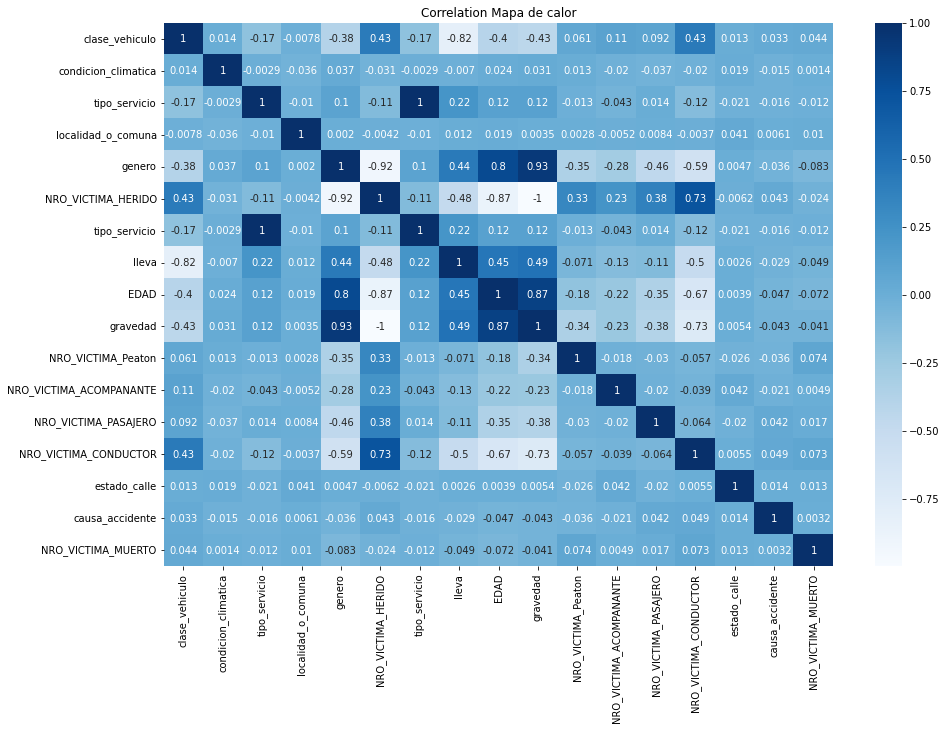

In [ ]:
fig = plt.figure(figsize=(15,10))
DF_Graf = Df_Resul2[['clase_vehiculo','condicion_climatica','tipo_servicio','Mes',
                     'localidad_o_comuna','genero','NRO_VICTIMA_HERIDO','tipo_servicio','lleva','EDAD','gravedad',
                     'NRO_VICTIMA_Peaton','NRO_VICTIMA_ACOMPANANTE','NRO_VICTIMA_PASAJERO','NRO_VICTIMA_CONDUCTOR',
                     'estado_calle','causa_accidente','NRO_VICTIMA_MUERTO']]

sns.heatmap(DF_Graf.corr(method='pearson'), annot = True, cmap="Blues")
plt.title("Correlation Mapa de calor")

## Histograma entre dos variables

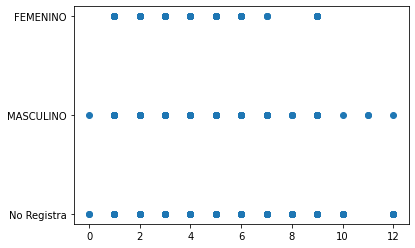

In [ ]:
plt.scatter(Df_Resul2['clase_vehiculo'],Df_Resul2['GENERO'])


Frecuencia por característica - Heridos


<function matplotlib.pyplot.show>

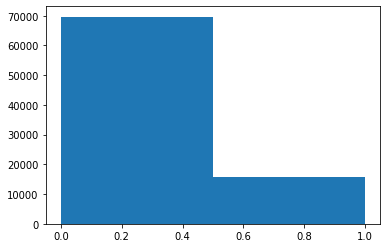

In [ ]:
# Muestra el desbalanceo del Dataset respecto al numero de heridos
print('Frecuencia por característica - Heridos')
plt.hist(Df_Resul2['NRO_VICTIMA_HERIDO'], bins=2)
plt.show

Frecuencia por característica - Muertes


<function matplotlib.pyplot.show>

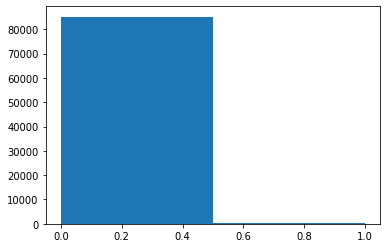

In [ ]:
# Muestra el desbalanceo del DF respecto al numero de muertos
print('Frecuencia por característica - Muertes')
plt.hist(Df_Resul2['NRO_VICTIMA_MUERTO'], bins=2)
plt.show

# Clasificacion con logistic regresion - Heridos

## prueba con desbalanceo de df - con regresion logistica


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


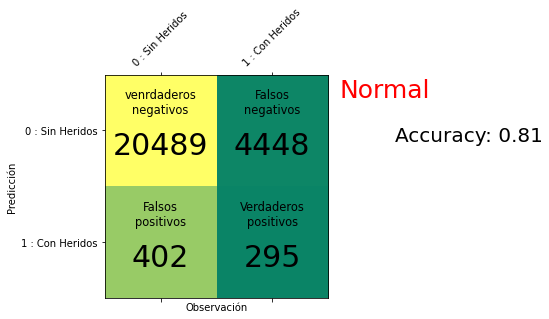

Sin entrenar: ROC AUC=0.500
Regresión Logistica despues de entrenar: ROC AUC=0.521


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


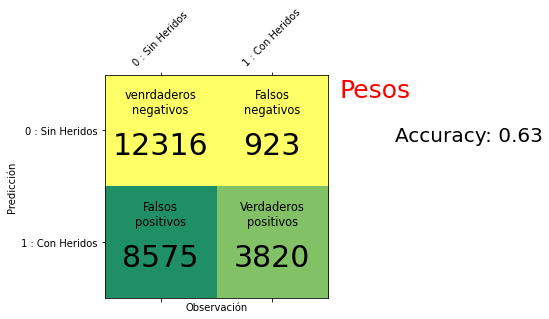

Sin entrenar: ROC AUC=0.500
Regresión Logistica despues de entrenar: ROC AUC=0.697


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


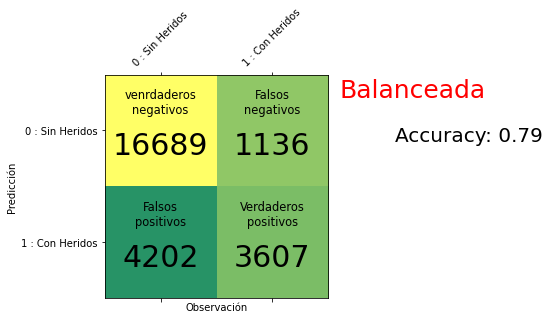

Sin entrenar: ROC AUC=0.500
Regresión Logistica despues de entrenar: ROC AUC=0.780


In [ ]:
Df_X = Df_Resul2[['clase_vehiculo','condicion_climatica','tipo_servicio','mes','dia','rango_horas','localidad_o_comuna']]
Df_Y = Df_Resul2[['NRO_VICTIMA_HERIDO']] # caracteristica a predecir

#Separo los datos en  train y test
X_train, X_test, y_train, y_test = train_test_split(Df_X,Df_Y, test_size=.3, shuffle=True)

#Se escalan todos los datos debido a que se tienen los datos en diferentes unidades y rangos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# Evaluacion del algoritmo en forma tradicional
model = LogisticRegression().fit(X_train, y_train)
matriz_de_confusion(y_test, np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0),"Normal")

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, model.predict(X_test))
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logistica despues de entrenar: ROC AUC=%.3f' % (lr_auc))

# Evaluacion del algoritmo en aumentando pesos de forma manual, dandole mas peso a la categoria del positivo
model = LogisticRegression(class_weight={0 : 1, 1: 10}).fit(X_train, y_train)
matriz_de_confusion(y_test,  np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0),"Pesos")
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, model.predict(X_test))
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logistica despues de entrenar: ROC AUC=%.3f' % (lr_auc))

# Evaluacion del algoritmo en forma de balanceo automatico
model = LogisticRegression(class_weight="balanced").fit(X_train, y_train)
matriz_de_confusion(y_test,  np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0),"Balanceada")
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, model.predict(X_test))
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logistica despues de entrenar: ROC AUC=%.3f' % (lr_auc))

## Aplicando "Balanced" a regresion logistica

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


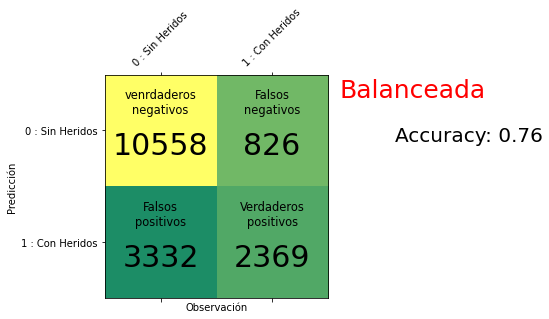

Sin entrenar: ROC AUC=0.500
Regresión Logistica despues de entrenar: ROC AUC=0.788


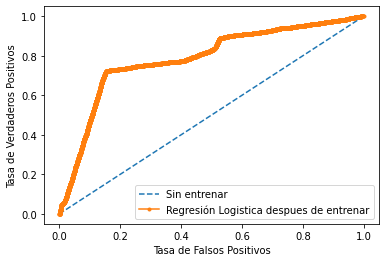

In [ ]:
Df_Resul2= Df_Resul2.replace(np.nan,"0")
Df_X = Df_Resul2[['clase_vehiculo','condicion_climatica','tipo_servicio',
                  'mes','dia','rango_horas','localidad_o_comuna']]
Df_Y = Df_Resul2[['NRO_VICTIMA_HERIDO']]

#Separo los datos en  train y test
X_train, X_test, y_train, y_test = train_test_split(Df_X,Df_Y, test_size=.2, shuffle=True)

#Se escalan todos los datos debido a que se tienen los datos en diferentes unidades y rangos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# defino algoritmo a utilizar
model = LogisticRegression(class_weight="balanced", random_state=23)

#Entreno el modelo
model.fit(X_train, y_train)

#Realizo una predicción
Y_pred = model.predict_proba(X_test)[:,1]
y_pred2 = np.where(Y_pred > 0.5, 1, 0)
matriz_de_confusion(y_test, y_pred2,"Balanceada")

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]

# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, Y_pred)

# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logistica despues de entrenar: ROC AUC=%.3f' % (lr_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, Y_pred)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logistica despues de entrenar')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()
#exportar
#Df_EX = Df_Resul2[['clase_vehiculo','CLASE_VEHICULO','condicion_climatica','CONDICION_CLIMATICA','tipo_servicio','TIPO_SERVICIO',
#                  'mes','dia','rango_horas','Rango_Horas','localidad_o_comuna','LOCALIDAD_O_COMUNA','NRO_VICTIMA_HERIDO','NRO_VICTIMA_MUERTO']]
#Df_EX.to_csv("DATOS.csv",sep="\t")

In [ ]:
Test_vehiculo= 9 # Motocicleta
Test_clima = 3 # normal
Test_tipo =  3 # particular
Test_vblemes =  9 # Septiembre
Test_vbledia = 1 # Lunes
Test_Horario = 3 # 18-21
Test_Localidad = 47 #Zona Centro

vector=np.array([[Test_vehiculo,Test_clima,Test_tipo,Test_vblemes,Test_vbledia,Test_Horario,Test_Localidad]])
pred_proba = model.predict_proba(vector)
pred=model.predict(vector)
np.set_printoptions(suppress=True)
print('vector de prediccion: ', pred_proba)
print('prediccion: ', pred)
print('precision :',model.score(X_test,y_test))

vector de prediccion:  [[0.00034496 0.99965504]]
prediccion:  [1.]
precision : 0.7566286215978929


# Clasificacion con logistic regresion - Muertos 

## prueba con desbalanceo de df - con regresion logistica


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


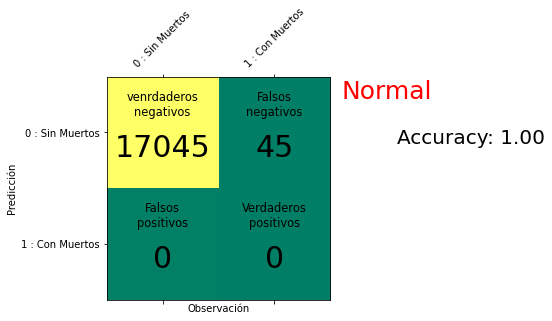

Sin entrenar: ROC AUC=0.500
Regresión Logistica despues de entrenar: ROC AUC=0.500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


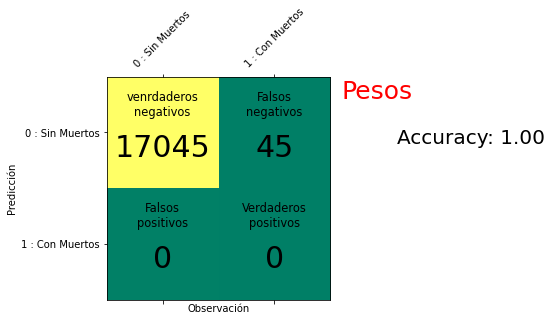

Sin entrenar: ROC AUC=0.500
Regresión Logistica despues de entrenar: ROC AUC=0.500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


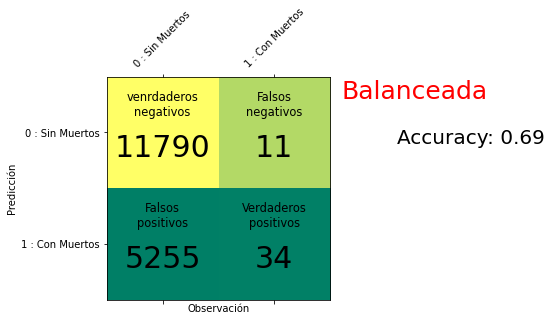

Sin entrenar: ROC AUC=0.500
Regresión Logistica despues de entrenar: ROC AUC=0.724


In [ ]:
Df_Resul2= Df_Resul2.replace(np.nan,"0")
Df_X = Df_Resul2[['clase_vehiculo','condicion_climatica','tipo_servicio','mes','dia','rango_horas','localidad_o_comuna']]
Df_Y = Df_Resul2[['NRO_VICTIMA_MUERTO']]


#Separo los datos en  train y test
X_train, X_test, y_train, y_test = train_test_split(Df_X,Df_Y, test_size=.2, shuffle=True)

#Se escalan todos los datos # debido a que se tienen los datos en diferentes unidades y rangos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

Y_pred =  np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0)
#y_pred2 = np.where(Y_pred > 0.5, 1, 0)

model = LogisticRegression().fit(X_train, y_train)
matriz_de_confusion_muertos(y_test,np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0),"Normal")
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, model.predict(X_test))
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logistica despues de entrenar: ROC AUC=%.3f' % (lr_auc))

model = LogisticRegression(class_weight={0 : 1, 1: 10}).fit(X_train, y_train)
matriz_de_confusion_muertos(y_test, np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0),"Pesos")
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, model.predict(X_test))
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logistica despues de entrenar: ROC AUC=%.3f' % (lr_auc))

model = LogisticRegression(class_weight="balanced").fit(X_train, y_train)
matriz_de_confusion_muertos(y_test, np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0),"Balanceada")
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, model.predict(X_test))
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logistica despues de entrenar: ROC AUC=%.3f' % (lr_auc))

## Aplicando "Balanced" a regresion logistica

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC-AUC 0.7191748657958811
Precision: 0.6730401529636711


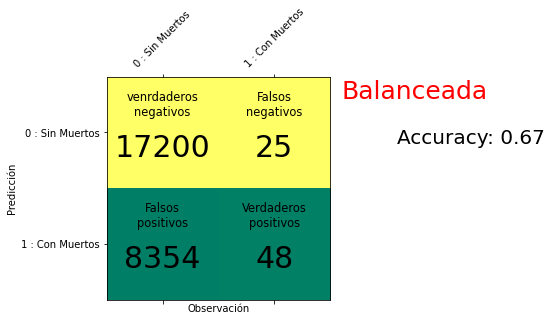

Sin entrenar: ROC AUC=0.500
Regresión Logistica despues de entrenar: ROC AUC=0.719


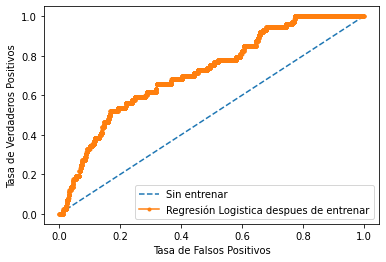

In [ ]:
Df_Resul2= Df_Resul2.replace(np.nan,"0")
Df_X = Df_Resul2[['clase_vehiculo','condicion_climatica','tipo_servicio',
                  'mes','dia','rango_horas','localidad_o_comuna']]
Df_Y = Df_Resul2[['NRO_VICTIMA_MUERTO']]


#Separo los datos en  train y test
X_train, X_test, y_train, y_test = train_test_split(Df_X,Df_Y, 
                                                      test_size=.3, 
                                                      shuffle=True)


#Se escalan todos los datos debido a que se tienen los datos en diferentes unidades y rangos
escalar_m = StandardScaler()
X_train = escalar_m.fit_transform(X_train)
X_test = escalar_m.transform(X_test)


# defino algoritmo a utilizar
model_RL_M = LogisticRegression(class_weight="balanced", random_state=23)

#Entreno el modelo
model_RL_M.fit(X_train, y_train)

#Realizo una predicción
Y_pred_M = model_RL_M.predict_proba(X_test)[:,1]
y_pred2_M = np.where(Y_pred_M > 0.5, 1, 0)
precision_M = model_RL_M.score(X_test,y_test)
 
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]


# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, Y_pred_M)
print('ROC-AUC',lr_auc)
print('Precision:',precision_M)




matriz_de_confusion_muertos(y_test, y_pred2_M,"Balanceada")
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logistica despues de entrenar: ROC AUC=%.3f' % (lr_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, Y_pred_M)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logistica despues de entrenar')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

In [ ]:
Test_vehiculo= 9 # Motocicleta
Test_clima = 3 # normal
Test_tipo =  3 # particular
Test_vblemes =  9 # Septiembre
Test_vbledia = 1 # Lunes
Test_Horario = 3 # 18-21
Test_Localidad = 47 #Zona Centro

vector=np.array([[Test_vehiculo,Test_clima,Test_tipo,Test_vblemes,Test_vbledia,Test_Horario,Test_Localidad]])
pred = model_RL_M.predict_proba(vector)
print('vector de prediccion: ', pred)
pred = model_RL_M.predict(vector)
print('prediccion: ', pred)
print('precision :',model_RL_M.score(X_test,y_test))

vector de prediccion:  [[0. 1.]]
prediccion:  [1.]
precision : 0.6730401529636711


# Clasificacion con Random Forest - Heridos **OK**

## Randomforest busqueda hiperparametros - GridSearchCv

In [ ]:
# RandomForest model ( Encontrar los mejores hiperparametros - Busqueda GridSearchCv)
Df_Resul2= Df_Resul2.replace(np.nan,"0")
Df_X = Df_Resul2[['clase_vehiculo','condicion_climatica','tipo_servicio','mes','dia',
                  'rango_horas','localidad_o_comuna']]
Df_Y = Df_Resul2[['NRO_VICTIMA_HERIDO']]

parametros = {"criterion" : ("gini" , "entropy"),
              "n_estimators" : (20,50,80,100,140,180,200,220),
              "max_samples" : (1/3,2/3),
              "max_depth" : (10,20,30),
              "min_samples_leaf" : (8,15,20)}

bosque = RandomForestClassifier()

rejilla = GridSearchCV(bosque,
                       parametros,
                       scoring="roc_auc",
                       cv=5)

rejilla.fit(Df_X,Df_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (10, 20, 30),
                         'max_samples': (0.3333333333333333,
                                         0.6666666666666666),
                         'min_samples_leaf': (8, 15, 20),
                         'n_estimators': (20, 50, 80, 100, 140, 180, 200, 220)},
             scoring='roc_auc')

In [ ]:
# vemos los resultados de los mejores hiperparametros
print(rejilla.cv_results_["rank_test_score"])
print(rejilla.cv_results_["mean_test_score"])
print(rejilla.best_score_)
print(rejilla.best_params_)

[  9  43  79  42  63   5  56  38 212  26  49 157 160  92  54  36 128 153
 107 183 166  66 179 155 188  31  28  50   4   3   6   8 130  18  67  35
  46  45  13  37  60  15  16  44  19  12  32  11 275 248 226 242 201 214
 231 218 202 162 102 146  97 122 114  96 209 159 150  57 113 108 139  75
 287 284 260 270 265 250 253 254 221 225 177 215 167 163 123 154 238 140
 172 132  99  94  95  74 283 273 217 237 227 236 204 229 243 192 133 106
 100  62  90  80 234 207 143 176 119 148  69 112 261 266 277 286 258 271
 268 272 194 220 187 170 198 189 175 151 181  76 145 116 124 118 141  70
 184 105  84  22  39  33  21   2 240  68 120  51  73  52  48  53 252 178
 168 197 111 104 152 149  41  23  17   1   7  47  29  25  86  85  30  59
  27  55  14  24 206  61  20  10  65  40  34  58 282 256 232 216 228 210
 235 224 245 126 156 171 127  64  72 103 239 195 199 136  89 180  93  87
 285 255 281 278 274 264 251 257 244 205 213 174 161 158 169 173 182 185
 121  77  71 144  82  88 259 241 219 246 223 230 23

## Aplicando Random Forest con los mejores hiperparametros

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Precisión del modelo: 0.8384516330432746
lr_auc: 0.8565190289940726


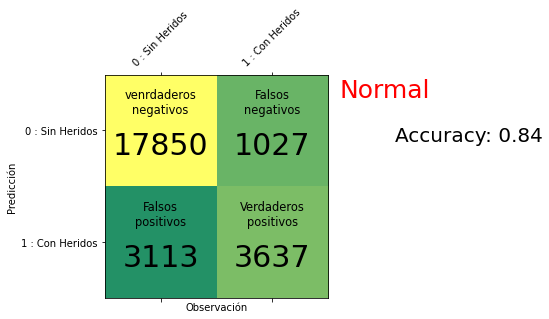

Sin entrenar: ROC AUC=0.500
RandomForest despues de entrenar: ROC AUC=0.857


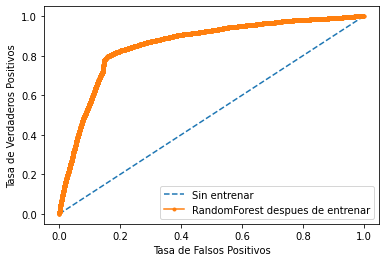

In [ ]:
Df_X = Df_Resul2[['clase_vehiculo','condicion_climatica','tipo_servicio',
                  'mes','dia','rango_horas','localidad_o_comuna']]
Df_Y = Df_Resul2[['NRO_VICTIMA_HERIDO']]

#Separo los datos en  train y test
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(Df_X,Df_Y, 
                                                              test_size=0.3, 
                                                              shuffle=True) 

#{'criterion': 'entropy', 'max_depth': 10, 'max_samples': 0.6666666666666666, 
#'min_samples_leaf': 8, 'n_estimators': 100}
RF_Model_Ok_heridos = RandomForestClassifier(n_estimators=100, 
                                  criterion ="entropy",
                                  min_samples_leaf=8,
                                  max_samples = 2/3,
                                  max_depth= 10,
                                  class_weight='balanced',
                                  random_state=23)

RF_Model_Ok_heridos.fit(X_trainrf,y_trainrf)
precision_RF = RF_Model_Ok_heridos.score(X_testrf, y_testrf) 

Y_pred_RF = RF_Model_Ok_heridos.predict_proba(X_testrf)[:,1]
y_pred2_RF = np.where(Y_pred_RF > 0.5, 1, 0)


#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_testrf))]

# Calculamos el AUC
ns_auc = roc_auc_score(y_testrf, ns_probs)
lr_auc = roc_auc_score(y_testrf, Y_pred_RF)


print('Precisión del modelo:',precision_RF)
print('lr_auc:',lr_auc)



# Imprimimos en pantalla
matriz_de_confusion(y_testrf, y_pred2_RF,"Normal")
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('RandomForest despues de entrenar: ROC AUC=%.3f' % (lr_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_testrf, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_testrf, Y_pred_RF)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RandomForest despues de entrenar')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

In [ ]:
Test_vehiculo= 1 # Automovil
Test_clima = 3 # normal
Test_tipo =  3 # particular
Test_vblemes =  10 # Octubre
Test_vbledia = 5 # Viernes
Test_Horario = 2 # 15-18
Test_Localidad = 23 #las vegas

vector=np.array([[Test_vehiculo,Test_clima,Test_tipo,Test_vblemes,Test_vbledia,Test_Horario,Test_Localidad]])
pred = RF_Model_Ok_heridos.predict_proba(vector)
print('vector de prediccion: ', pred)
pred = RF_Model_Ok_heridos.predict(vector)
print('prediccion: ', pred)
print('precision :',RF_Model_Ok_heridos.score(X_testrf, y_testrf))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


vector de prediccion:  [[0.80950076 0.19049924]]
prediccion:  [0.]
precision : 0.8384516330432746


# Clasificacion con Random Forest - Muertos **OK**

## Randomforest busqueda hiperparametros - GridSearchCv

In [ ]:
# RandomForest model ( Encontrar los mejores hiperparametros - Busqueda GridSearchCv)
Df_Resul2= Df_Resul2.replace(np.nan,"0")
Df_X = Df_Resul2[['clase_vehiculo','condicion_climatica','tipo_servicio',
                  'mes','dia','rango_horas','localidad_o_comuna']]
Df_Y = Df_Resul2[['NRO_VICTIMA_MUERTO']]

parametros = {"criterion" : ("gini" , "entropy"),
              "n_estimators" : (30,50,80),
              "max_samples" : (1/3,2/3),
              "max_depth" : (5,10,20),
              "min_samples_leaf" : (10,20,30),
              "class_weight" : ("balanced","balanced_subsample")}

bosque = RandomForestClassifier()
rejilla = GridSearchCV(bosque,
                       parametros,
                       scoring="roc_auc",
                       cv=5)

rejilla.fit(Df_X,Df_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ('balanced', 'balanced_subsample'),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': (5, 10, 20),
                         'max_samples': (0.3333333333333333,
                                         0.6666666666666666),
                         'min_samples_leaf': (10, 20, 30),
                         'n_estimators': (30, 50, 80)},
             scoring='roc_auc')

In [ ]:
# vemos los resultados de los mejores hiperparametros
print(rejilla.cv_results_["rank_test_score"])
print(rejilla.cv_results_["mean_test_score"])
print(rejilla.best_score_)
print(rejilla.best_params_)

# predecir
#mejor_bosque = rejilla.best_estimator_
#print(mejor_bosque.predict(X_test))

[185 206 161 171 149  92  61 163  74 211 118  78 215 156 119 205 167 103
 117 168 113 116  27  86  56 142  31 165 179  95 199 123  85 188 152  62
  77  48  63 125  13  24  65  16   7  93  18  20 182  55  51  90   9   2
 196 155 128 139 140 192 210 115 166 197 193  75 127 134 160 137 157 153
 202 212 102 148 175  73  53  81  29 164  44 135 190 195  83 122 184  67
 143 104  10  79  38  33 198  39  22 173  12  35  88  32  54 159  41   5
 214 200 111 208 162 158 154 169 191 121 177 187 100  82 120 132 176 147
 180 178 141 145  76  80 108  19  64 133 174 150  68  34  57  60 105  66
 204 114  49 131  40  50  43  52   1 172  28  37  89  17   3  46  42   4
 213 201 110 203 194 151 130 101 112 136 129 124 138 146  96 209 144  99
  72 186 170 181  98  94 189 109  69 216 183 107  84 106  58 126  26  30
  25  59  91  87  45  15  70   6  11 207  71  36  23  97   8  47  14  21]
[0.76419867 0.75905491 0.76743868 0.76603658 0.7683022  0.77357247
 0.77777636 0.7672261  0.77585478 0.75361675 0.77075284 

## Aplicando Random Forest con los mejores hiperparametros

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Precisión del modelo: 0.6266315481416447


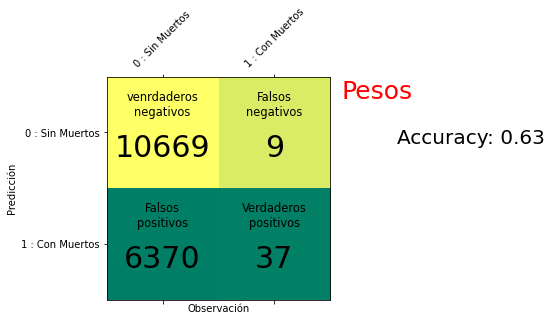

Sin entrenar: ROC AUC=0.500
RandomForest despues de entrenar: ROC AUC=0.768


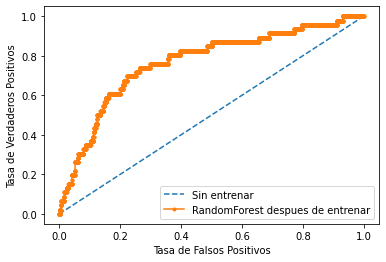

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Precisión del modelo: 0.7674568334796605


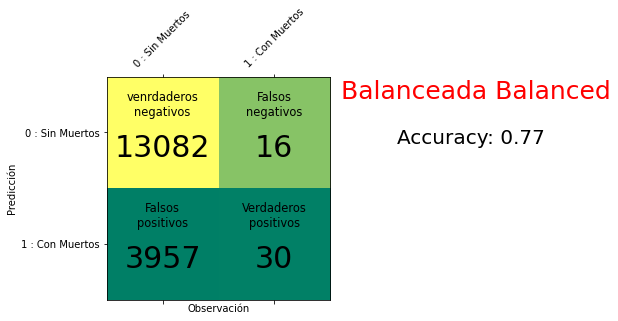

Sin entrenar: ROC AUC=0.500
RandomForest despues de entrenar: ROC AUC=0.774


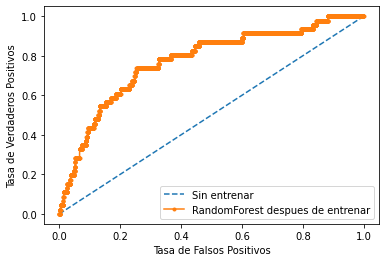

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Precisión del modelo: 0.7725490196078432


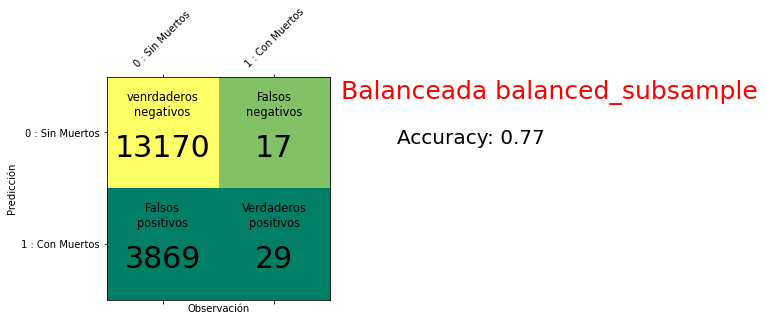

Sin entrenar: ROC AUC=0.500
RandomForest despues de entrenar: ROC AUC=0.776


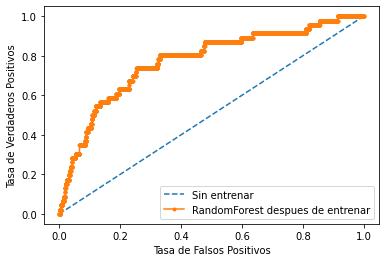

In [ ]:
Df_Resul2= Df_Resul2.replace(np.nan,"0")
Df_X = Df_Resul2[['clase_vehiculo','condicion_climatica','tipo_servicio','mes','dia','rango_horas','localidad_o_comuna']]
Df_Y = Df_Resul2[['NRO_VICTIMA_MUERTO']]


#Separo los datos en  train y test
X_train, X_test, y_train, y_test = train_test_split(Df_X,Df_Y, test_size=.2, shuffle=True) 

def randomForest(classw,titulo):
  # mejores parametros generados por 
  #{'class_weight': 'balanced_subsample', 'max_depth': 4, 'max_samples': 0.3333333333333333, 'min_samples_leaf': 30, 'n_estimators': 100}

  RF_Model = RandomForestClassifier(n_estimators=100, 
                                  random_state=23, 
                                  criterion ="entropy",
                                  min_samples_leaf=30,
                                  max_samples = 1/3,
                                  max_depth= 4,
                                  class_weight=classw)

  RF_Model.fit(X_train,y_train)
  precision = RF_Model.score(X_test, y_test) # accuracy
  print('Precisión del modelo:',precision)

  Y_pred = RF_Model.predict_proba(X_test)[:,1]
  y_pred2 = np.where(Y_pred > 0.5, 1, 0)
  matriz_de_confusion_muertos(y_test, y_pred2,titulo)


  #Generamos un clasificador sin entrenar , que asignará 0 a todo
  ns_probs = [0 for _ in range(len(y_test))]


  # Calculamos el AUC
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, Y_pred)

  # Imprimimos en pantalla
  print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
  print('RandomForest despues de entrenar: ROC AUC=%.3f' % (lr_auc))

  # Calculamos las curvas ROC
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, Y_pred)
  # Pintamos las curvas ROC
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RandomForest despues de entrenar')
  # Etiquetas de los ejes
  pyplot.xlabel('Tasa de Falsos Positivos')
  pyplot.ylabel('Tasa de Verdaderos Positivos')
  pyplot.legend()
  pyplot.show()

randomForest({0 : 1, 1: 1000},'Pesos')
randomForest("balanced",'Balanceada Balanced')
randomForest("balanced_subsample",'Balanceada balanced_subsample')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Precisión del modelo: 0.7859525899912204


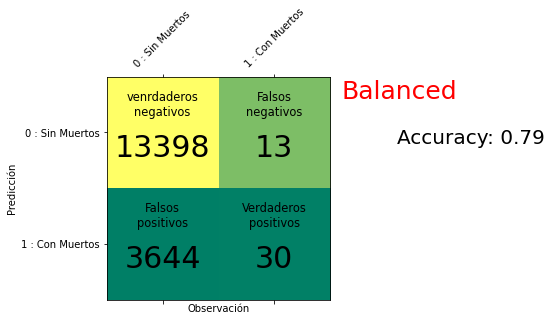

Sin entrenar: ROC AUC=0.500
RandomForest despues de entrenar: ROC AUC=0.813


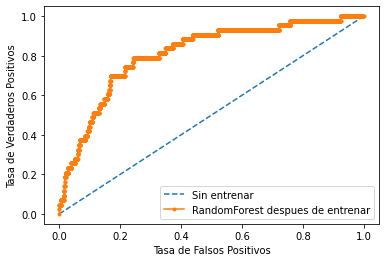

In [ ]:
# Generar algoritmo de Random Forest, con mejores hiperparametros y balanceado
Df_Resul2= Df_Resul2.replace(np.nan,"0")
Df_X = Df_Resul2[['clase_vehiculo','condicion_climatica','tipo_servicio','mes','dia','rango_horas','localidad_o_comuna']]
Df_Y = Df_Resul2[['NRO_VICTIMA_MUERTO']]


#Separo los datos en  train y test
X_train, X_test, y_train, y_test = train_test_split(Df_X,Df_Y, test_size=.2, shuffle=True) 

# mejores parametros generados por 
#{'class_weight': 'balanced_subsample', 'entropy': 'gini', 'max_depth': 4, 'max_samples': 0.3333333333333333, 'min_samples_leaf': 30, 'n_estimators': 500}

RF_Model_ok_Muertos = RandomForestClassifier(n_estimators=500, 
                                 random_state=23, 
                                 criterion ="entropy",
                                 min_samples_leaf=30,
                                 max_samples = 1/3,
                                 max_depth= 4,
                                 class_weight='balanced')

RF_Model_ok_Muertos.fit(X_train,y_train)
precision = RF_Model_ok_Muertos.score(X_test, y_test) # accuracy
print('Precisión del modelo:',precision)

Y_pred = RF_Model_ok_Muertos.predict_proba(X_test)[:,1]
y_pred2 = np.where(Y_pred > 0.5, 1, 0)
matriz_de_confusion_muertos(y_test, y_pred2,'Balanced')


#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]


# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, Y_pred)

# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('RandomForest despues de entrenar: ROC AUC=%.3f' % (lr_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, Y_pred)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RandomForest despues de entrenar')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()


In [ ]:
Test_vehiculo= 9 # Motocicleta
Test_clima = 3 # normal
Test_tipo =  3 # particular
Test_vblemes =  9 # Septiembre
Test_vbledia = 1 # Lunes
Test_Horario = 3 # 18-21
Test_Localidad = 47 #Zona Centro
RF_Model_ok_Muertos = RandomForestClassifier(n_estimators=500, 
                                  random_state=23, 
                                  criterion ="entropy",
                                  min_samples_leaf=30,
                                  max_samples = 1/3,
                                  max_depth= 4,
                                  class_weight='balanced')
RF_Model_ok_Muertos.fit(X_train,y_train)
precision = RF_Model_ok_Muertos.score(X_test, y_test) # accuracy
vector=np.array([[Test_vehiculo,Test_clima,Test_tipo,Test_vblemes,Test_vbledia,Test_Horario,Test_Localidad]])

pred = RF_Model_ok_Muertos.predict_proba(vector)
print('vector de prediccion: ', pred)
pred = RF_Model_ok_Muertos.predict(vector)
print('prediccion: ', pred)
print('precision :',RF_Model_ok_Muertos.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


vector de prediccion:  [[0.4575202 0.5424798]]
prediccion:  [1.]
precision : 0.7859525899912204


# Clasificacion utilizando redes neuronales - Heridos

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision MLPClassifier: 0.8299018101467727
Reporte de clasificador: 
 MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(3, 3),
              random_state=23, solver='lbfgs')
               precision    recall  f1-score   support

         0.0       0.82      0.67      0.73     13946
         1.0       0.18      0.33      0.24      3139

    accuracy                           0.61     17085
   macro avg       0.50      0.50      0.49     17085
weighted avg       0.70      0.61      0.64     17085


Sin entrenar: ROC AUC=0.500
MLPClassifier: ROC AUC=0.824


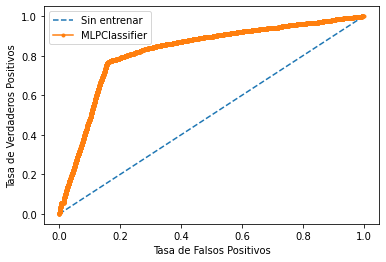

In [ ]:
# Prediccion Herdiso red neuronal (MLPClassifier)

Df_Resul2= Df_Resul2.replace(np.nan,"0")
Df_X = Df_Resul2[['clase_vehiculo','condicion_climatica','tipo_servicio',
                  'mes','dia','rango_horas','localidad_o_comuna']]
Df_Y = Df_Resul2[['NRO_VICTIMA_HERIDO']]


#Separo los datos en  train y test
X_train, X_test, y_train, y_test = train_test_split(Df_X,Df_Y, 
                                                    test_size=.2, 
                                                    shuffle=True,
                                                    )

#Se escalan todos los datos # debido a que se tienen los datos en diferentes unidades y rangos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)


mlr=MLPClassifier(solver='lbfgs',
                  alpha=1e-5, 
                  hidden_layer_sizes=(3,3),
                  activation ="logistic",
                  random_state=23
                  )

# Entrenamos el modelo
mlr.fit(X_train, y_train)

print('Precision MLPClassifier: '+str(mlr.score(X_train,y_train)))

# Predecimos las probabilidades
prediccion_mlr = mlr.predict_proba(X_test)[:,1]
prediccion_mlr2 = np.where(Y_pred > 0.5, 1, 0)

print("Reporte de clasificador: \n %s\n %s\n"
      %(mlr, classification_report(y_test,prediccion_mlr2) ))

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]

# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, prediccion_mlr)

# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('MLPClassifier: ROC AUC=%.3f' % (lr_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, prediccion_mlr)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLPClassifier')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()





In [ ]:
Test_vehiculo= 9 # Motocicleta
Test_clima = 3 # normal
Test_tipo =  3 # particular
Test_vblemes =  9 # Septiembre
Test_vbledia = 1 # Lunes
Test_Horario = 3 # 18-21
Test_Localidad = 47 #Zona Centro

vector=np.array([[Test_vehiculo,Test_clima,Test_tipo,Test_vblemes,Test_vbledia,Test_Horario,Test_Localidad]])

pred = mlr.predict_proba(vector)
print('vector de prediccion: ', pred)
pred = mlr.predict(vector)
print('prediccion: ', pred)
print('precision :',str(mlr.score(X_train,y_train)))

vector de prediccion:  [[0.48552353 0.51447647]]
prediccion:  [1.]
precision : 0.8299018101467727


# Clasificacion utilizando redes neuronales - Muertos

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision MLPClassifier: 0.9974245284399373
Reporte de clasificador: 
 MLPClassifier(alpha=1e-05, batch_size=200, hidden_layer_sizes=(7, 7),
              random_state=23, solver='lbfgs')
               precision    recall  f1-score   support

         0.0       1.00      0.78      0.88     17039
         1.0       0.00      0.17      0.00        46

    accuracy                           0.78     17085
   macro avg       0.50      0.48      0.44     17085
weighted avg       0.99      0.78      0.87     17085


Sin entrenar: ROC AUC=0.500
MLPClassifier: ROC AUC=0.742


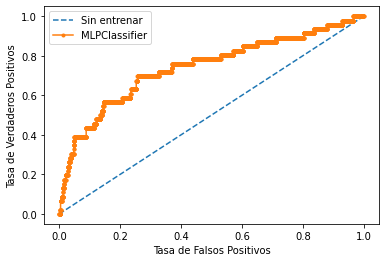

In [ ]:
# Prediccion Herdiso red neuronal (MLPClassifier)

Df_Resul2= Df_Resul2.replace(np.nan,"0")
Df_X = Df_Resul2[['clase_vehiculo','condicion_climatica','tipo_servicio',
                  'mes','dia','rango_horas','localidad_o_comuna']]
Df_Y = Df_Resul2[['NRO_VICTIMA_MUERTO']]


#Separo los datos en  train y test
X_train, X_test, y_train, y_test = train_test_split(Df_X,Df_Y,
                                                    test_size=.2, 
                                                    shuffle=True)

#Se escalan debido a que se tienen los datos en diferentes unidades y rangos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)


mlr=MLPClassifier(solver='lbfgs', # adam,lbfgs
                  alpha=1e-5, 
                  hidden_layer_sizes=(7,7),
                  activation ="relu", # logistic,relu
                  random_state=23,
                  batch_size= 200
                  )

# Entrenamos el modelo
mlr.fit(X_train, y_train)

print('Precision MLPClassifier: '+str(mlr.score(X_train,y_train))) 

# Predecimos las probabilidades
prediccion_mlr = mlr.predict_proba(X_test)[:,1]
prediccion_mlr2  = np.where(Y_pred > 0.5, 1, 0)


print("Reporte de clasificador: \n %s\n %s\n"
      %(mlr, classification_report(y_test,prediccion_mlr2) ))

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]

# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, prediccion_mlr)

# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('MLPClassifier: ROC AUC=%.3f' % (lr_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, prediccion_mlr)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLPClassifier')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()





In [ ]:
Test_vehiculo= 9 # Motocicleta
Test_clima = 3 # normal
Test_tipo =  3 # particular
Test_vblemes =  9 # Septiembre
Test_vbledia = 1 # Lunes
Test_Horario = 3 # 18-21
Test_Localidad = 47 #Zona Centro

vector=np.array([[Test_vehiculo,Test_clima,Test_tipo,Test_vblemes,Test_vbledia,Test_Horario,Test_Localidad]])
pred = mlr.predict_proba(vector)
print('vector de prediccion: ', pred)
pred = mlr.predict(vector)
print('prediccion: ', pred)
print('precision :',str(mlr.score(X_train,y_train)))

vector de prediccion:  [[0.99831053 0.00168947]]
prediccion:  [0.]
precision : 0.9974245284399373


# Conclusion de seleccion del modelo

### Seleccion del modelo para la clasificacion de heridos en accidentes

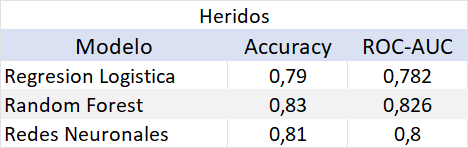

### Seleccion del modelo para la clasificacion de muertos en accidentes

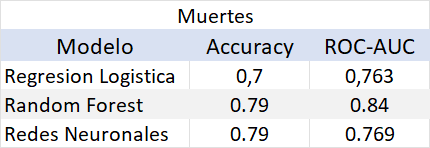

# **Proceso de ruta segura**

# Generar clasificacion para todas las comunas con las variables del usuario

In [ ]:
# Actualizo la probabilidad de accidentes por cada comuna, utilizando el modelo random forest que obtuvo la mejor prediccion
DF_Comunas["Clasifi_total"]=0.00
DF_Comunas['Precision_heridos']=0.00
DF_Comunas['Clasifi_muertos']=0.00
DF_Comunas['Clasifi_heridos']=0.00
DF_Comunas['Precision_muertos']=0.00
DF_Rutas['Peso']=0

vehiculo= 10 # 2 automovil - 4 - bus, 6 - camioneta , 10 - motocicleta, 9 maquinaria
clima = 3 # normal
tipo =  3 # particular
vblemes =  10 # octubre
vbledia = 5 # viernes
Horario = 2 # 15-18
desde = "LOMA DE LAS BRUJAS"   #LOMA DE LAS BRUJAS
hasta = "LAS VEGAS" #LAS VEGAS

# calculo la prediccion para todas las comunas
for i in range(len(DF_Comunas)): 
  vector=np.array([[vehiculo,clima,tipo,vblemes,vbledia,Horario,DF_Comunas.loc[i,"Codigo_Comuna"]]])
  # Se predice la probabilidad de heridos utilizando el modelo random forest
  pred = RF_Model_Ok_heridos.predict_proba(vector)[:,1]
  preci = RF_Model_Ok_heridos.score(X_testrf, y_testrf)
  # se predice la probabilidad de muertes teniendo en cuenta el modelo de regresion logistica
  pred_muertos  = RF_Model_ok_Muertos.predict_proba(vector)[:,1]
  preci_muertos = RF_Model_ok_Muertos.score(X_test,y_test)
  vPesoAddMuertos=0
  if pred_muertos >0.5 :
    vPesoAddMuertos=3
  # se actualiza el DF
  DF_Comunas.loc[i,"Clasifi_heridos"]=pred 
  DF_Comunas.loc[i,"Precision_heridos"]=preci
  DF_Comunas.loc[i,"Clasifi_muertos"]=pred_muertos + vPesoAddMuertos
  DF_Comunas.loc[i,"Precision_muertos"]=preci_muertos
  DF_Comunas.loc[i,"Clasifi_total"]=pred + pred_muertos + vPesoAddMuertos
  

# calculo los pesos Peso = Probabilidad_punto_inicial + Probabilidad_punto_final
for i in range(len(DF_Rutas)): 
  vpeso=0.00
  vpeso= vpeso + float(DF_Comunas.loc[DF_Comunas.Comuna == DF_Rutas.loc[i,"Origen"], 'Clasifi_total'])
  vpeso= vpeso + float(DF_Comunas.loc[DF_Comunas.Comuna == DF_Rutas.loc[i,"Destino"], 'Clasifi_total'])
  DF_Rutas.loc[i,'Peso']= vpeso

display(DF_Comunas.head(20))
display(DF_Rutas.head(20))

#DF_Comunas.to_csv("comunas.csv",sep="\t")
#DF_Rutas.to_csv("rutas.csv",sep="\t")
#Df_Resul2.to_csv("DATOS.csv",sep="\t")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

,Codigo_Comuna,Comuna,x,y,Clasifi_total,Precision_heridos,Clasifi_muertos,Clasifi_heridos,Precision_muertos
0,0,ALCALA,6,12,0.787760,0.838452,0.422162,0.365598,0.785953
1,1,ALTO DE MISAEL,12,15,0.806181,0.838452,0.441545,0.364635,0.785953
2,2,BOSQUES DE ZUNIGA,11,19,0.804077,0.838452,0.441872,0.362205,0.785953
3,3,BUCAREST,9,13,0.786183,0.838452,0.437544,0.348638,0.785953
4,4,EL CHINGUI,12,5,0.800078,0.838452,0.441290,0.358788,0.785953
5,5,EL CHOCHO,15,10,0.797885,0.838452,0.439847,0.358039,0.785953
6,6,EL DORADO,7,9,0.806191,0.838452,0.446517,0.359674,0.785953
7,7,EL ESCOBERO,16,5,0.806191,0.838452,0.446517,0.359674,0.785953
8,8,EL ESMERALDAL,14,13,0.802825,0.838452,0.443150,0.359674,0.785953
9,9,EL PORTAL,7,14,0.810144,0.838452,0.450469,0.359674,0.785953


,index,Origen,Destino,kms,Peso
0,0,ALCALA,LAS VEGAS,0.50,4.657685
1,1,ALCALA,MILAN VALLEJUELOS,0.25,4.737480
2,2,ALCALA,ZONA CENTRO,1.25,1.765990
3,3,ALCALA,SAN MARCOS,1.50,4.756109
4,4,ALCALA,EL PORTAL,1.40,1.597903
5,5,ALTO DE MISAEL,ZUNIGA,0.31,1.762563
6,6,ALTO DE MISAEL,LAS ORQUIDEAS,0.39,4.658907
7,7,ALTO DE MISAEL,URIBE ANGEL,0.63,4.779522
8,8,ALTO DE MISAEL,EL ESMERALDAL,1.13,1.609005
9,9,BOSQUES DE ZUNIGA,LAS VEGAS,2.74,4.674002


# Comparacion entre Algoritmo de Dijkstra y A-Estrella

In [ ]:
ruta = nx.from_pandas_edgelist(DF_Rutas,source='Origen',target='Destino', edge_attr=['Peso','kms'])
def Show_Path(path):
  total_peso = 0
  total_kms = 0

  for i in range(len(path)-1):
    origin = path[i]
    destination = path[i+1]
    kms = ruta[origin][destination]['kms']
    peso = ruta[origin][destination]['Peso']

    total_peso = total_peso + peso
    total_kms = total_kms + kms
    print(" %s -> %s\n  - Kilometros: %s ; Peso %s " % (
        origin,
        destination,
        kms,
        peso)
    )
  print(" \n Kilometros totales: %s ; Peso total: %s \n" %(total_kms, total_peso))


In [ ]:
def heuristic(a,b):
  x1 = float(DF_Comunas.loc[DF_Comunas.loc[:,"Comuna"] ==a , 'x'])
  y1 = float(DF_Comunas.loc[DF_Comunas.loc[:,"Comuna"] == a , 'y'])
  x2 = float(DF_Comunas.loc[DF_Comunas.loc[:,"Comuna"] ==b , 'x'])
  y2 = float(DF_Comunas.loc[DF_Comunas.loc[:,"Comuna"] == b , 'y'])

  distancia = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
  return distancia

# Comparando A* con Dijkstra
for peso in [None, "kms","Peso"]:
  print('Algoritmo A-Estrella con parametro de weight en :',peso )
  djk_path_A_Star = nx.astar_path(ruta, source=desde, target=hasta, heuristic=heuristic, weight=peso)
  print(djk_path_A_Star )
  Show_Path(djk_path_A_Star)

for peso in [None, "kms","Peso"]: 
  print('Algoritmo Dijkstra con parametro de weight en :',peso)
  djk_path_Con_peso = nx.dijkstra_path(ruta, source=desde, target=hasta, weight=peso)
  print(djk_path_Con_peso )
  Show_Path(djk_path_Con_peso)


Algoritmo A-Estrella con parametro de weight en : None
['LOMA DE LAS BRUJAS', 'MESA', 'ZONA CENTRO', 'ALCALA', 'LAS VEGAS']
 LOMA DE LAS BRUJAS -> MESA
  - Kilometros: 1.47 ; Peso 7.81596166579652 
 MESA -> ZONA CENTRO
  - Kilometros: 0.59 ; Peso 4.929192582831151 
 ZONA CENTRO -> ALCALA
  - Kilometros: 1.25 ; Peso 1.7659904275510285 
 ALCALA -> LAS VEGAS
  - Kilometros: 0.5 ; Peso 4.6576850025128085 
 
 Kilometros totales: 3.81 ; Peso total: 19.16882967869151 

Algoritmo A-Estrella con parametro de weight en : kms
['LOMA DE LAS BRUJAS', 'MESA', 'ZONA CENTRO', 'ALCALA', 'LAS VEGAS']
 LOMA DE LAS BRUJAS -> MESA
  - Kilometros: 1.47 ; Peso 7.81596166579652 
 MESA -> ZONA CENTRO
  - Kilometros: 0.59 ; Peso 4.929192582831151 
 ZONA CENTRO -> ALCALA
  - Kilometros: 1.25 ; Peso 1.7659904275510285 
 ALCALA -> LAS VEGAS
  - Kilometros: 0.5 ; Peso 4.6576850025128085 
 
 Kilometros totales: 3.81 ; Peso total: 19.16882967869151 

Algoritmo A-Estrella con parametro de weight en : Peso
['LOMA DE LA

In [ ]:
djk_path_Con_peso = nx.all_shortest_paths(ruta, source=desde, target=hasta)
list(djk_path_Con_peso)

# Generacion con Algoritmos Ganadores

Nodos creados 
['ALCALA', 'LAS VEGAS', 'MILAN VALLEJUELOS', 'ZONA CENTRO', 'SAN MARCOS', 'EL PORTAL', 'ALTO DE MISAEL', 'ZUNIGA', 'LAS ORQUIDEAS', 'URIBE ANGEL', 'EL ESMERALDAL', 'BOSQUES DE ZUNIGA', 'VILLA GRANDE', 'BUCAREST', 'LA MAGNOLIA', 'OBRERO', 'EL CHINGUI', 'EL SALADO', 'SAN JOSE', 'LOMA DE LAS BRUJAS', 'EL CHOCHO', 'LOMA DEL ATRAVEZADO', 'LA INMACULADA', 'EL DORADO', 'LA PAZ', 'LAS ANTILLAS', 'SAN RAFAEL', 'MESA', 'JARDINES', 'LA MINA', 'EL TRIANON', 'LOMA DEL BARRO', 'PONTE VEDRA', 'LA SEBASTIANA', 'LA PRADERA', 'LAS FLORES', 'PRIMAVERA', 'LOS NARANJOS', 'LAS CASITAS', 'LOMA DEL CHOCHO', 'TRIANON']
Numero de nodos:  41

 Arcos creados 
[('ALCALA', 'LAS VEGAS'), ('ALCALA', 'MILAN VALLEJUELOS'), ('ALCALA', 'ZONA CENTRO'), ('ALCALA', 'SAN MARCOS'), ('ALCALA', 'EL PORTAL'), ('ALCALA', 'EL DORADO'), ('LAS VEGAS', 'BOSQUES DE ZUNIGA'), ('LAS VEGAS', 'EL PORTAL'), ('LAS VEGAS', 'JARDINES'), ('LAS VEGAS', 'LAS CASITAS'), ('LAS VEGAS', 'PRIMAVERA'), ('LAS VEGAS', 'MILAN VALLEJUELOS')

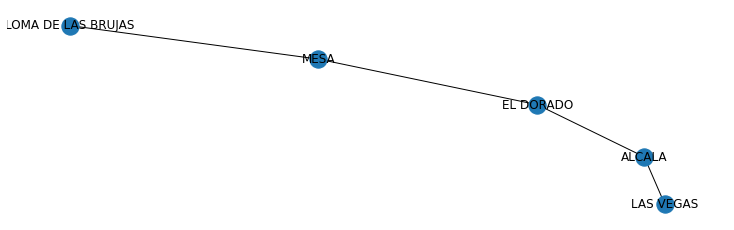

[Ruta color rojo]     : Ruta detectada por algoritmo de DIJKSTRA sin tener en cuenta la accidentalidad, no recomendada  



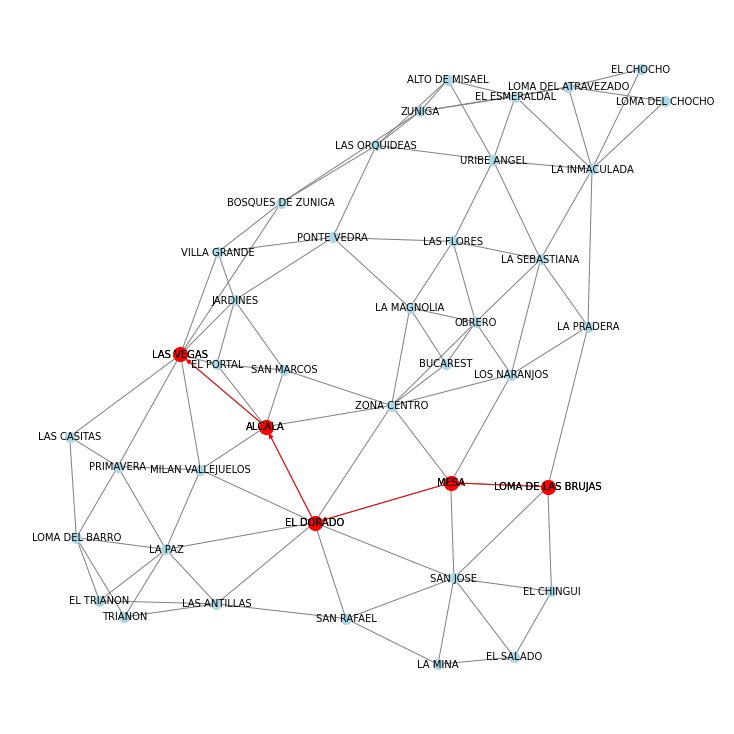


 Aplicando algoritmo de DIJKSTRA teniendo en cuenta el peso de la accidentalidad  
['LOMA DE LAS BRUJAS', 'LA PRADERA', 'LA INMACULADA', 'EL ESMERALDAL', 'ZUNIGA', 'BOSQUES DE ZUNIGA', 'LAS VEGAS']


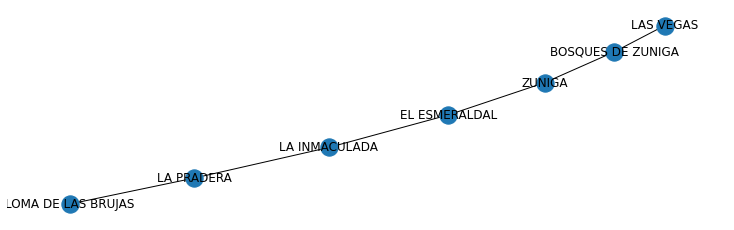

[Ruta color verde]    : Ruta recomendada con minima accidentalidad 



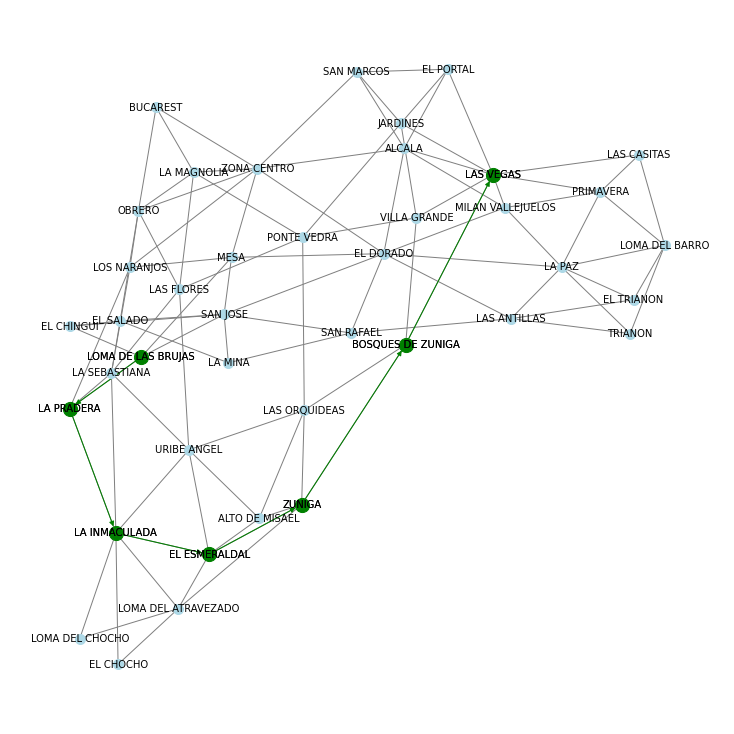


 Aplicando algoritmo de DIJKSTRA con menor distancia recorrida en Kilometros  
['LOMA DE LAS BRUJAS', 'LA PRADERA', 'LOS NARANJOS', 'ZONA CENTRO', 'SAN MARCOS', 'EL PORTAL', 'LAS VEGAS']


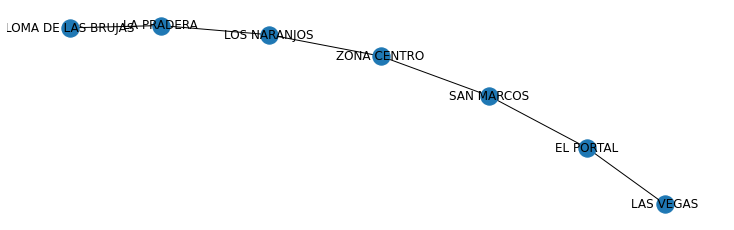

[Ruta color amarillo] : Ruta con menor recorrido en Kilometros sin tener en cuenta la accidentalidad  



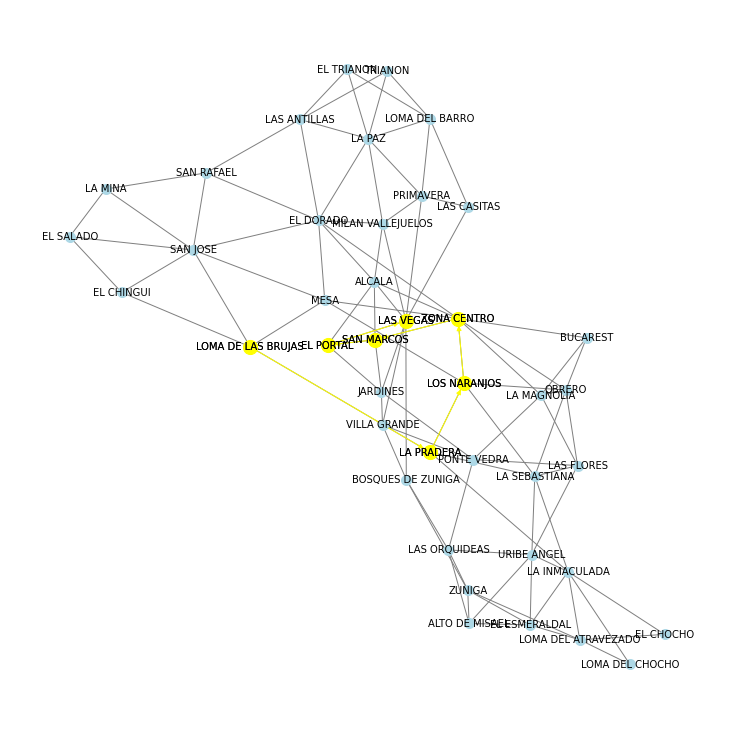

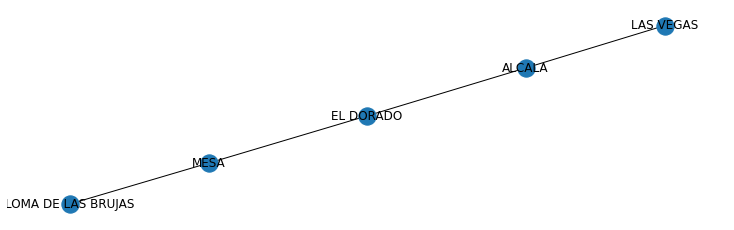

[Ruta color naranja] : Aplicando algoritmo de A-Estrella teniendo en cuenta el peso de la accidentalidad  



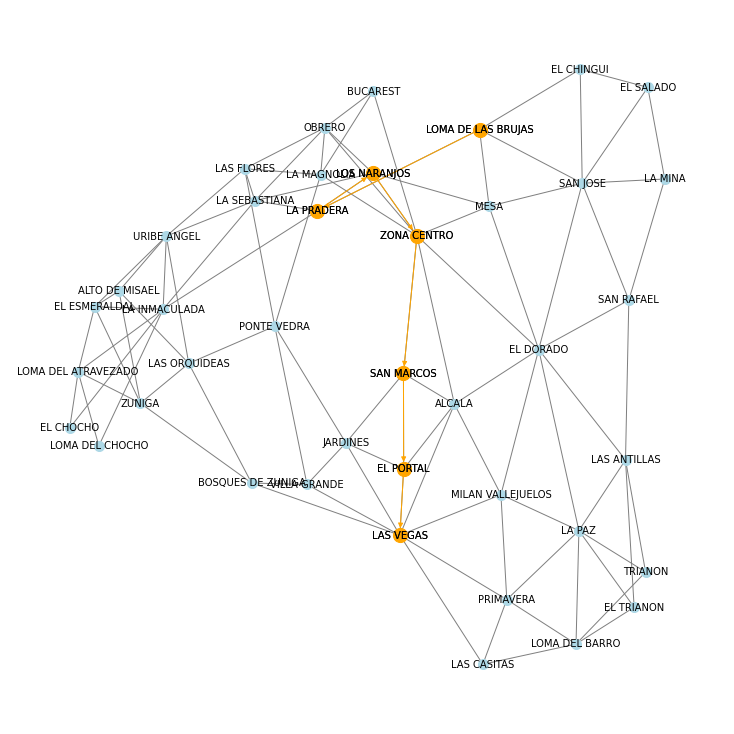


 Mapa consolidado de rutas 

[Ruta color rojo]     : Ruta detectada por algoritmo de DIJKSTRA sin tener en cuenta la accidentalidad, no recomendada  
[Ruta color verde]    : Ruta recomendada con minima accidentalidad 
[Ruta color amarillo] : Ruta con menor recorrido en Kilometros sin tener en cuenta la accidentalidad  


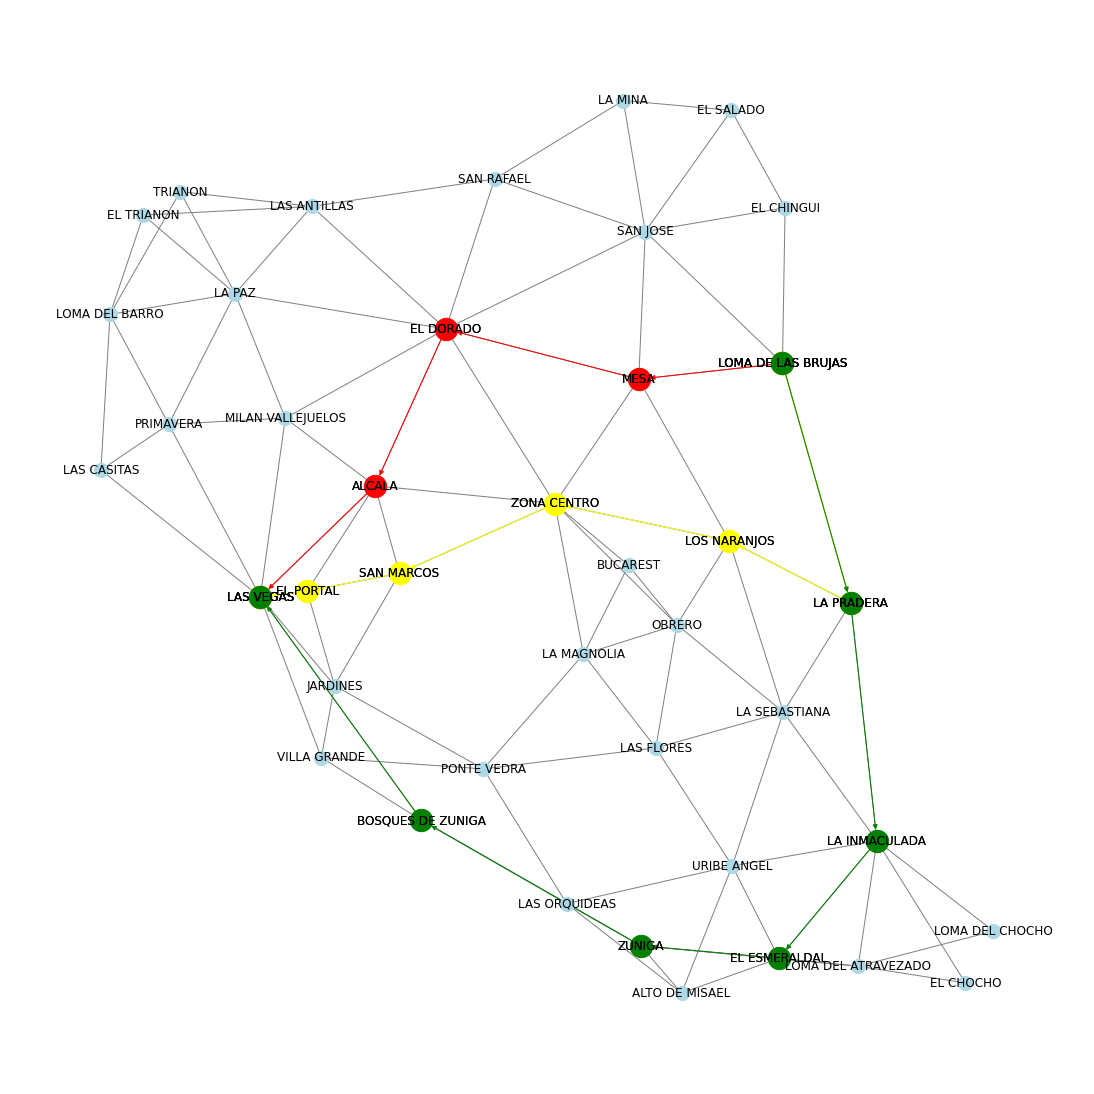

In [ ]:
# generamos el grafo a partir del dataframe rutas
ruta = nx.from_pandas_edgelist(DF_Rutas,source='Origen',target='Destino', edge_attr=['Peso','kms'])
print('Nodos creados ')
nodos = ruta.nodes()
nodnum = ruta.number_of_nodes()
print(nodos)
print('Numero de nodos: ',nodnum)
print('\n Arcos creados ')
arcos = ruta.edges()
arcnum = ruta.number_of_edges()
print(arcos)
print('Numero de arcos: ',arcnum)
print('\n Orden del grafo :',ruta.order())

# sin peso
print('\n Aplicando algoritmo de DIJKSTRA sin tener en cuenta el peso de la accidentalidad  ')
djk_path_sin_peso = nx.dijkstra_path(ruta, source=desde, target=hasta, weight=False)
print(djk_path_sin_peso)
# graficar ruta
plt.figure(figsize =(10,3))
nx.draw(ruta.subgraph(djk_path_sin_peso), with_labels=True)
plt.show()
print("\x1b[1;31m"+"[Ruta color rojo]     : Ruta detectada por algoritmo de DIJKSTRA sin tener en cuenta la accidentalidad, no recomendada  ") 
mapa_unitario(djk_path_sin_peso,'red')
print('')
plt.show()

# con peso
print('\n Aplicando algoritmo de DIJKSTRA teniendo en cuenta el peso de la accidentalidad  ')
djk_path_Con_peso = nx.dijkstra_path(ruta, source=desde, target=hasta, weight='Peso')
print(djk_path_Con_peso)
# graficar ruta
plt.figure(figsize =(10,3))
nx.draw(ruta.subgraph(djk_path_Con_peso), with_labels=True)
plt.show()
print("\x1b[1;32m"+"[Ruta color verde]    : Ruta recomendada con minima accidentalidad ")
mapa_unitario(djk_path_Con_peso,'green')
print('')
plt.show()


# Aplicando algoritmo de DIJKSTRA con menor distancia recorrida en Kilometros
print('\n Aplicando algoritmo de DIJKSTRA con menor distancia recorrida en Kilometros  ')
djk_path_Con_kms = nx.dijkstra_path(ruta, source=desde, target=hasta, weight='kms')
print(djk_path_Con_kms)
# graficar ruta
plt.figure(figsize =(10,3))
nx.draw(ruta.subgraph(djk_path_Con_kms), with_labels=True)
plt.show()
print("\x1b[1;33m"+"[Ruta color amarillo] : Ruta con menor recorrido en Kilometros sin tener en cuenta la accidentalidad  ")
mapa_unitario(djk_path_Con_kms,'yellow')
print('')
plt.show()

# A-Estrella con peso
djk_path_A_Star = nx.astar_path(ruta, source=desde, target=hasta, heuristic=heuristic, weight=peso)
# graficar ruta
plt.figure(figsize =(10,3))
nx.draw(ruta.subgraph(djk_path_A_Star), with_labels=True)
plt.show()
print("\x1b[1;33m"+"[Ruta color naranja] : Aplicando algoritmo de A-Estrella teniendo en cuenta el peso de la accidentalidad  ")
mapa_unitario(djk_path_Con_kms,'orange')
print('')
plt.show()


# pintando mapa general
if djk_path_sin_peso == djk_path_Con_peso :
  print('Nodos sin peso y con peso iguales, no pintara ruta roja \n')
print('\n Mapa consolidado de rutas \n')
print("\x1b[1;31m"+"[Ruta color rojo]     : Ruta detectada por algoritmo de DIJKSTRA sin tener en cuenta la accidentalidad, no recomendada  ") 
print("\x1b[1;32m"+"[Ruta color verde]    : Ruta recomendada con minima accidentalidad ") 
print("\x1b[1;33m"+"[Ruta color amarillo] : Ruta con menor recorrido en Kilometros sin tener en cuenta la accidentalidad  ") 
print("\x1b[1;33m"+"[Ruta color narajna]  : Ruta detectada por algoritmo de A-Estrella sin tener en cuenta la accidentalidad, no recomendada  ") 
mapa_completo(djk_path_Con_peso,djk_path_sin_peso,djk_path_Con_kms,djk_path_A_Star)

# Tablero de Control

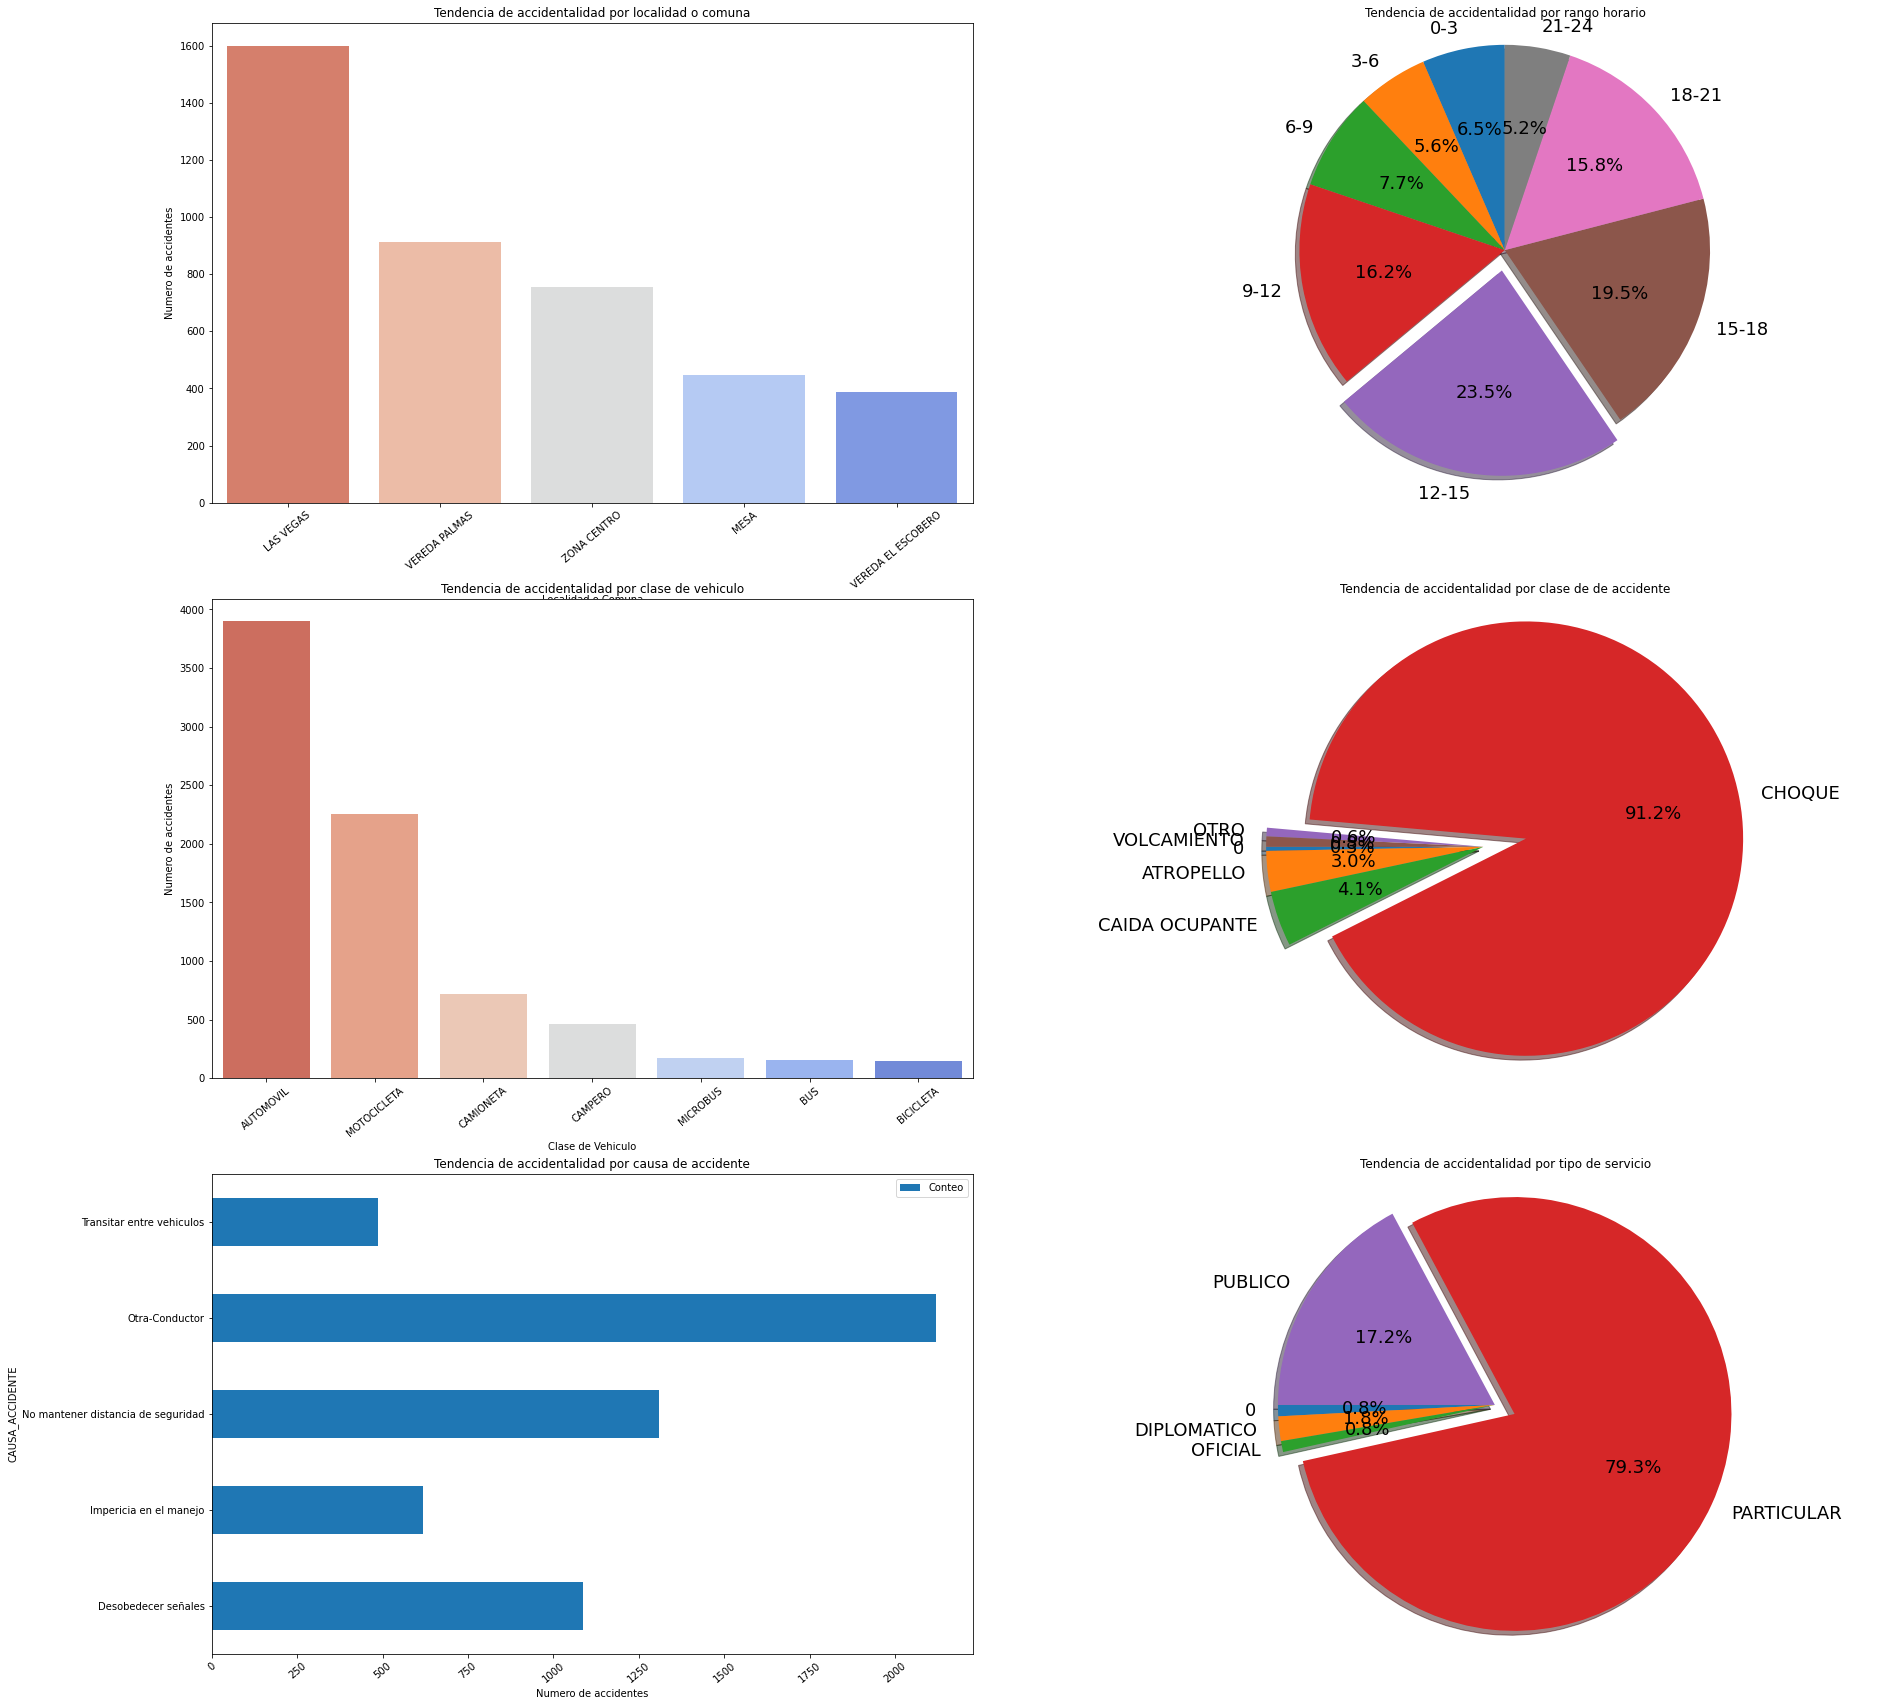

In [ ]:
# Dias 0 : Domingo / 1 : Lunes / 2 : Martes / 3 : Miercoles / 4 : Jueves / 5 : Viernes / 6 : Sabado
#Df_Resul2= Df_Resul2.replace(np.nan,"0")
vdia=0
tope_minimo = 300
Df_Resul2['Conteo']=1
DF_Tablero = Df_Resul2[['CLASE_VEHICULO','LOCALIDAD_O_COMUNA','Mes',
                        'dia','Rango_Horas','TIPO_SERVICIO',
                        'DESC_CLASE_ACCIDENTE','Conteo','CAUSA_ACCIDENTE']]
DF_Tablero = DF_Tablero[['LOCALIDAD_O_COMUNA','dia','Conteo']]
filtro = DF_Tablero['dia']==vdia
DF_Tablero = DF_Tablero[filtro]
DF_Tablero = DF_Tablero.groupby("LOCALIDAD_O_COMUNA" ,as_index=False).sum()
filtro = DF_Tablero['Conteo']>=tope_minimo
DF_Tablero = DF_Tablero[filtro]

# Grafico Accidentalidad por localidad o comuna
fig = plt.figure(figsize=(30, 30))
ax = plt.subplot(3,2,1)
ax = sns.barplot(x="LOCALIDAD_O_COMUNA", y="Conteo", data=DF_Tablero,
                 palette="coolwarm_r",
                 order = DF_Tablero.sort_values(by = 'Conteo', ascending=False).LOCALIDAD_O_COMUNA, ax=ax)
ax.set_title('Tendencia de accidentalidad por localidad o comuna')
ax.set_ylabel("Numero de accidentes")
ax.set_xlabel("Localidad o Comuna")
plt.xticks(rotation=40)

# Grafico de accidentalidad por franjas horarias
DF_Tablero = Df_Resul2[['Rango_Horas','dia','Conteo']]
filtro = DF_Tablero['dia']==vdia
DF_Tablero = DF_Tablero[filtro]
DF_Tablero = DF_Tablero.groupby("Rango_Horas" ,as_index=False).sum()

ax1 = plt.subplot(3,2,2)
lab=''
valores = ''
for i in range(len(DF_Tablero)): 
  lab=lab + DF_Tablero.loc[i,'Rango_Horas'] + ','
  valores = valores + str(DF_Tablero.loc[i,'Conteo']) + ','

lab=lab[0:len(lab)-1]
lab = lab.split(',')

valores=valores[0:len(valores)-1]
valores = valores.split(',')

labels = lab
sizes = valores 
desfase = (0,0,0,0,0.1,0,0,0)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, textprops={'fontsize': 18}, explode=desfase  )
ax1.axis('equal') 
ax1.set_title('Tendencia de accidentalidad por rango horario') 

# Grafico de accidentalidad por tipo de vehiculo
DF_Tablero = Df_Resul2[['CLASE_VEHICULO','dia','Conteo']]
filtro = DF_Tablero['dia']==vdia
DF_Tablero = DF_Tablero[filtro]
DF_Tablero = DF_Tablero.groupby("CLASE_VEHICULO" ,as_index=False).sum()
filtro = DF_Tablero['Conteo']>=100
DF_Tablero = DF_Tablero[filtro]

ax = plt.subplot(3,2,3)
ax = sns.barplot(x="CLASE_VEHICULO", y="Conteo", data=DF_Tablero, palette="coolwarm_r",
                 order = DF_Tablero.sort_values(by = 'Conteo', ascending=False).CLASE_VEHICULO, ax=ax)
ax.set_title('Tendencia de accidentalidad por clase de vehiculo')
ax.set_ylabel("Numero de accidentes")
ax.set_xlabel("Clase de Vehiculo")
plt.xticks(rotation=40)

# Grafico de accidentalidad por clase de accidente
DF_Tablero = Df_Resul2[['DESC_CLASE_ACCIDENTE','dia','Conteo']]
filtro = DF_Tablero['dia']==vdia
DF_Tablero = DF_Tablero[filtro]
DF_Tablero = DF_Tablero.groupby("DESC_CLASE_ACCIDENTE" ,as_index=False).sum()

ax1 = plt.subplot(3,2,4)
lab=''
valores = ''
for i in range(len(DF_Tablero)): 
  lab=lab + DF_Tablero.loc[i,'DESC_CLASE_ACCIDENTE'] + ','
  valores = valores + str(DF_Tablero.loc[i,'Conteo']) + ','

lab=lab[0:len(lab)-1]
lab = lab.split(',')

valores=valores[0:len(valores)-1]
valores = valores.split(',')

labels = lab
sizes = valores 
desfase = (0,0,0,0.2,0,0)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=180, textprops={'fontsize': 18}, explode=desfase )
ax1.axis('equal') 
ax1.set_title('Tendencia de accidentalidad por clase de de accidente') 

# grafica de accidentes por causa de accidentalidad
DF_Tablero = Df_Resul2[['CAUSA_ACCIDENTE','dia','Conteo']]
filtro = DF_Tablero['dia']==vdia
DF_Tablero = DF_Tablero[filtro]
DF_Tablero = DF_Tablero.groupby("CAUSA_ACCIDENTE" ,as_index=False).sum()
filtro = DF_Tablero['Conteo']>=tope_minimo
DF_Tablero = DF_Tablero[filtro]
DF_Tablero = DF_Tablero[['CAUSA_ACCIDENTE','Conteo']]
ax = plt.subplot(3,2,5)
ax = DF_Tablero.groupby('CAUSA_ACCIDENTE')['Conteo'].sum().plot(kind='barh', legend='Reverse')
ax.set_title('Tendencia de accidentalidad por causa de accidente')
ax.set_xlabel("Numero de accidentes")
plt.xticks(rotation=40)


# Grafico de accidentalidad por tipo de servicio
DF_Tablero = Df_Resul2[['TIPO_SERVICIO','dia','Conteo']]
filtro = DF_Tablero['dia']==vdia
DF_Tablero = DF_Tablero[filtro]
DF_Tablero = DF_Tablero.groupby("TIPO_SERVICIO" ,as_index=False).sum()

ax1 = plt.subplot(3,2,6)
lab=''
valores = ''
for i in range(len(DF_Tablero)): 
  lab=lab + DF_Tablero.loc[i,'TIPO_SERVICIO'] + ','
  valores = valores + str(DF_Tablero.loc[i,'Conteo']) + ','

lab=lab[0:len(lab)-1]
lab = lab.split(',')

valores=valores[0:len(valores)-1]
valores = valores.split(',')

labels = lab
sizes = valores 
desfase = (0,0,0,0.1,0)

ax1.pie(sizes, labels=labels,  autopct='%1.1f%%',
       shadow=True, startangle=180, textprops={'fontsize': 18} , explode=desfase)
ax1.axis('equal') 
ax1.set_title('Tendencia de accidentalidad por tipo de servicio') 


plt.show()

# Algoritmo de bellman_ford_path

['LOMA DE LAS BRUJAS', 'MESA', 'ZONA CENTRO', 'ALCALA', 'LAS VEGAS']


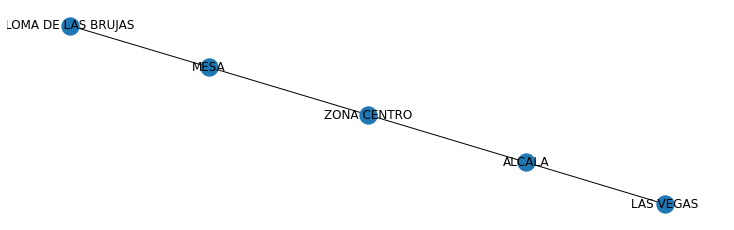

[Ruta color verde]    : Ruta recomendada con minima accidentalidad 



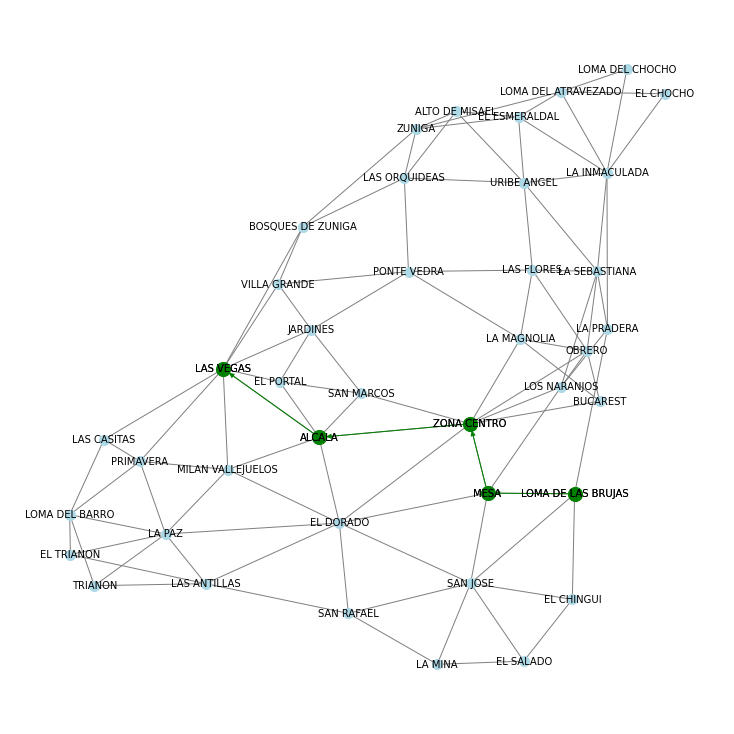

In [ ]:
djk_path_Con_peso = nx.bellman_ford_path(ruta, source=desde, target=hasta, weight='Peso')
#djk_path_Con_peso = nx.astar_path(ruta, source=desde, target=hasta, weight='Peso')
print(djk_path_Con_peso)
## graficar ruta
plt.figure(figsize =(10,3))
nx.draw(ruta.subgraph(djk_path_Con_peso), with_labels=True)
plt.show()
print("\x1b[1;32m"+"[Ruta color verde]    : Ruta recomendada con minima accidentalidad ")
mapa_unitario(djk_path_Con_peso,'green')
print('')
plt.show()